In [9]:
import pandas as pd
from simulation_para import square_length, bandwidth
from _utils import plot_cdf_pdf, compare_models, compare_cdfs_ks, compare_cdfs_emd, compare_cdfs_moments, calculate_area_throughput, calculate_and_rank_percentiles, plot_sinr_heatmap, generate_colorbar_ticks, duration_benchmarking, plot_sinr_heatmaps

In [10]:
# Results location
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

## Spectral Efficiencies

In [11]:
# load data from csv files
MODEL_DELTA_SE_SEs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SEs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SEs.csv', index_col=0)
MODEL_RELATIVE_SE_SEs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SEs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SEs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_DELTA_SINR_SEs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SEs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SEs.csv', index_col=0)
MODEL_RELATIVE_SINR_SEs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SEs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

MAXMIN_SEs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SEs.csv', index_col=0)
MAXPROD_SEs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SEs.csv', index_col=0)
SUMRATE_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SEs.csv', index_col=0)

In [12]:
SE_DATA_R_SE = {
    'MODEL_DELTA_SE_SEs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SEs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SEs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SEs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SEs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SEs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SEs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SEs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SEs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SEs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SEs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SEs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SE_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SEs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SEs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SEs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SEs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SEs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SEs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SEs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SEs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SEs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SEs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SEs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SEs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Spectral Efficiencies

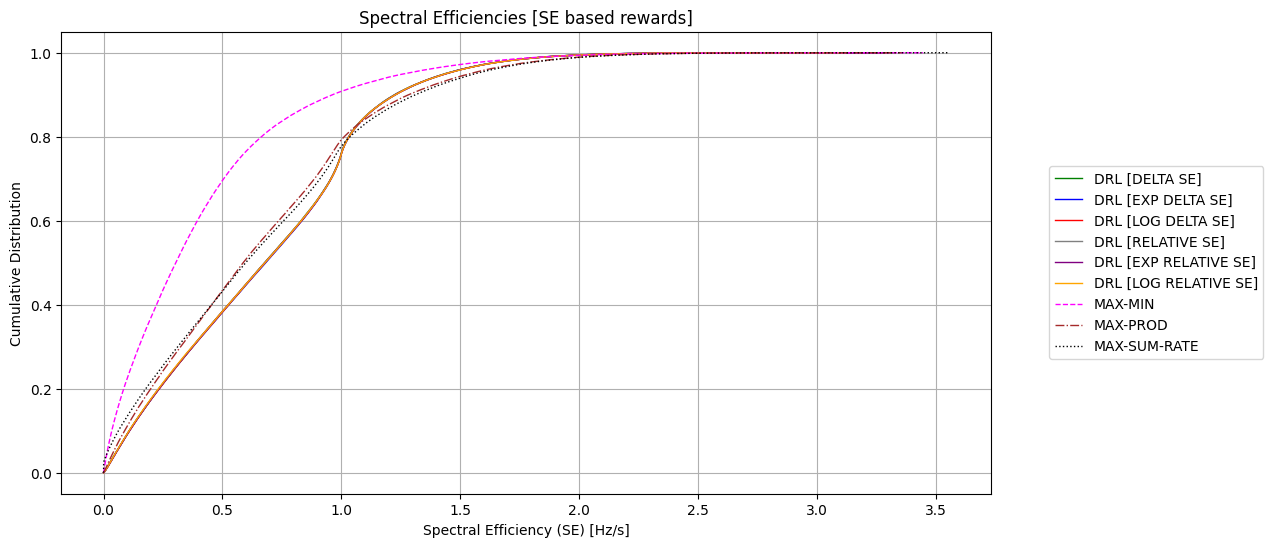

In [13]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

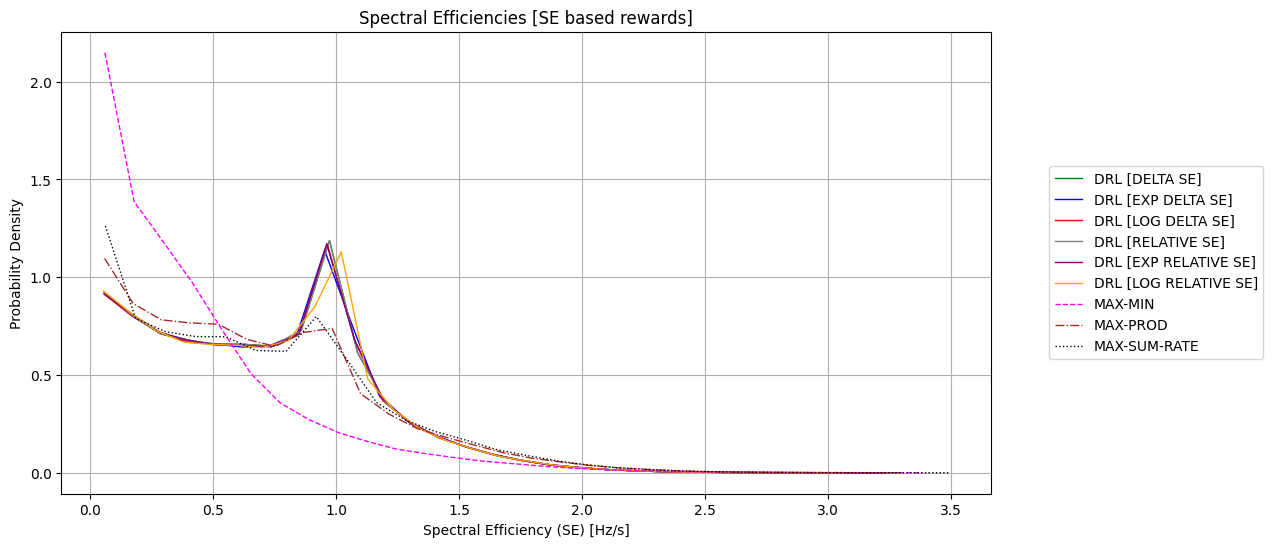

In [14]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

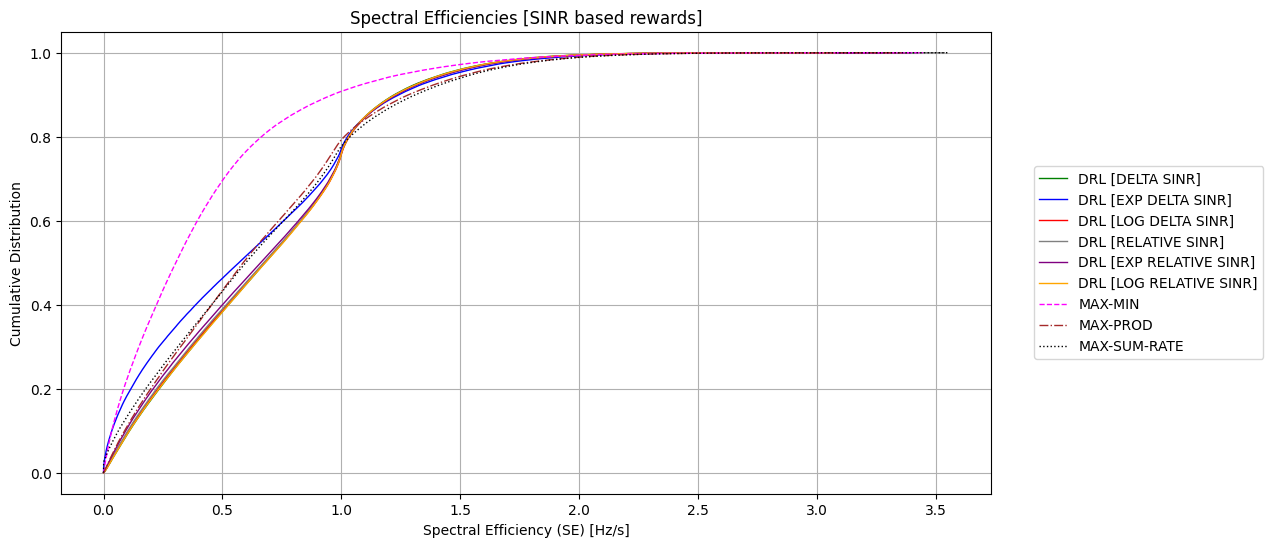

In [15]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

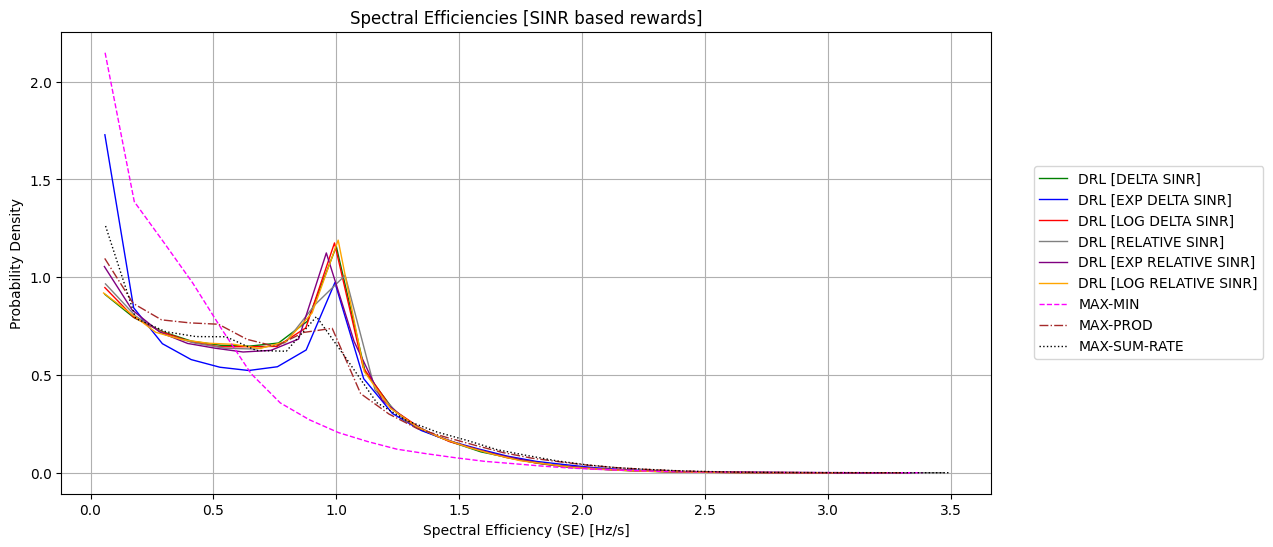

In [16]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

### Mean Spectral Efficiencies

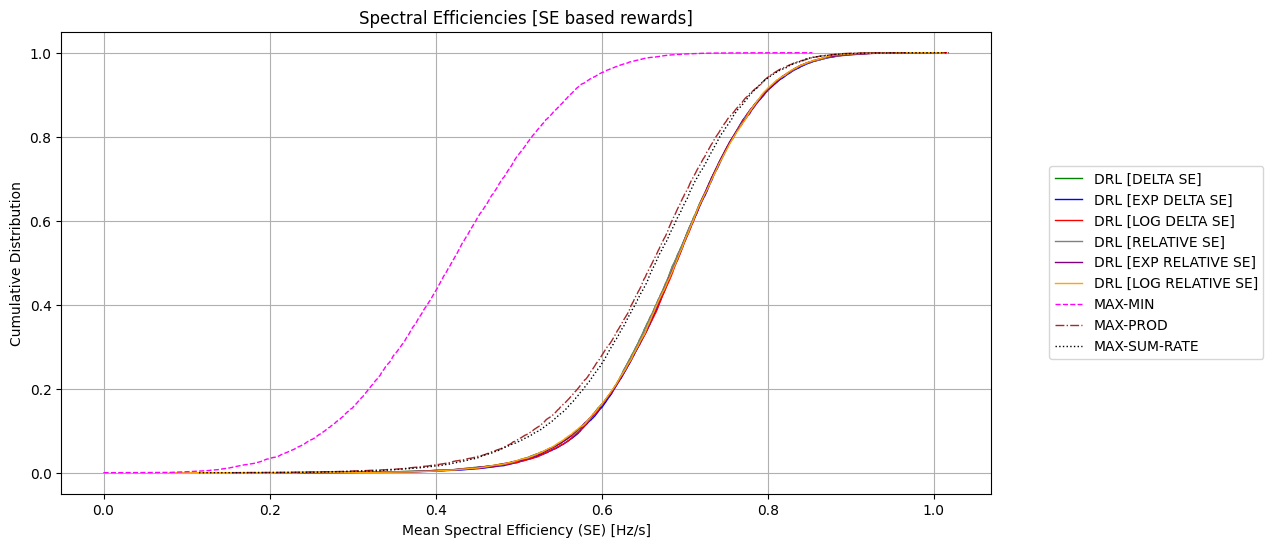

In [17]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

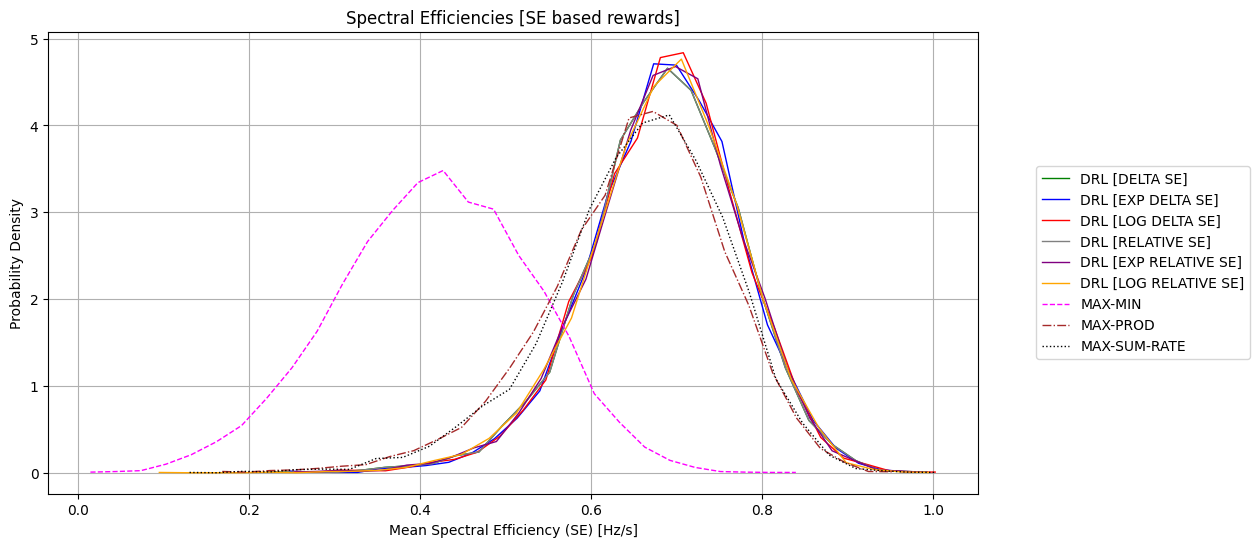

In [18]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

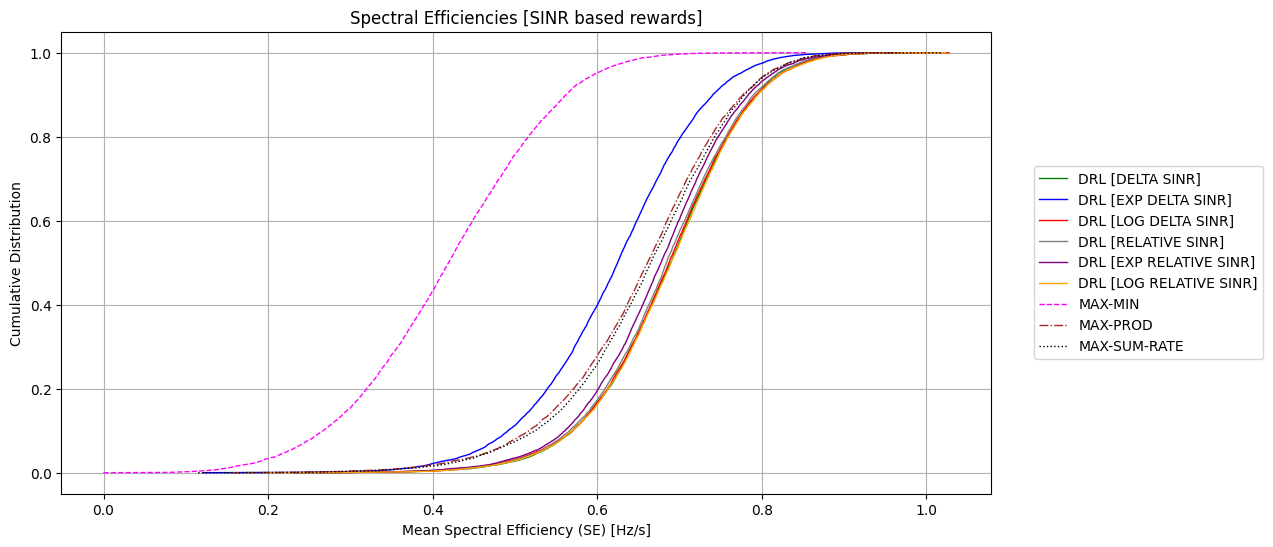

In [19]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

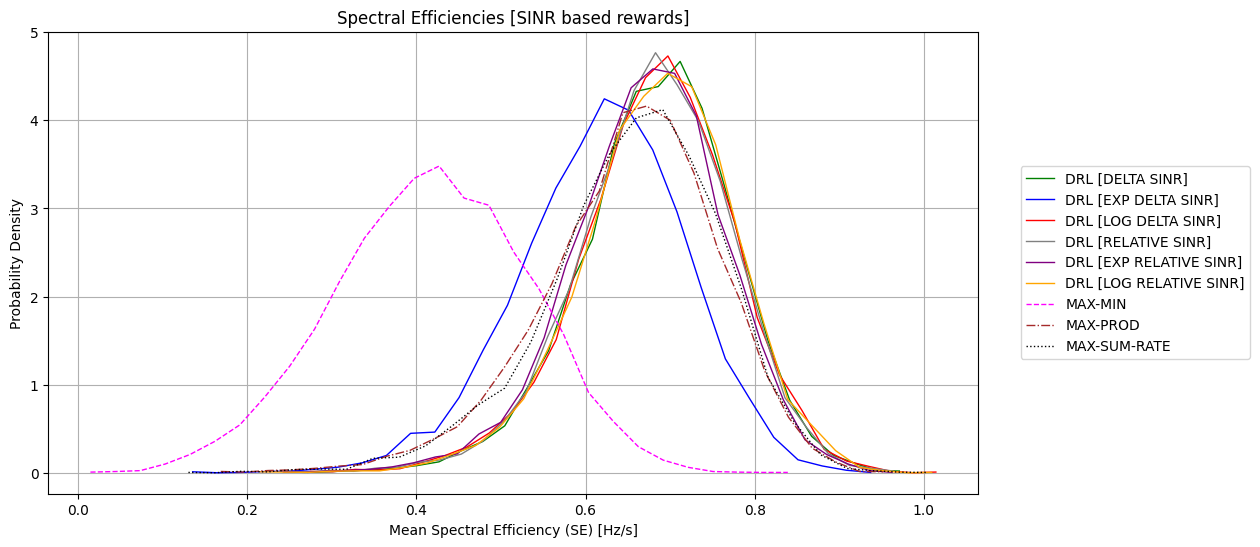

In [20]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

### Min Spectral Efficiencies

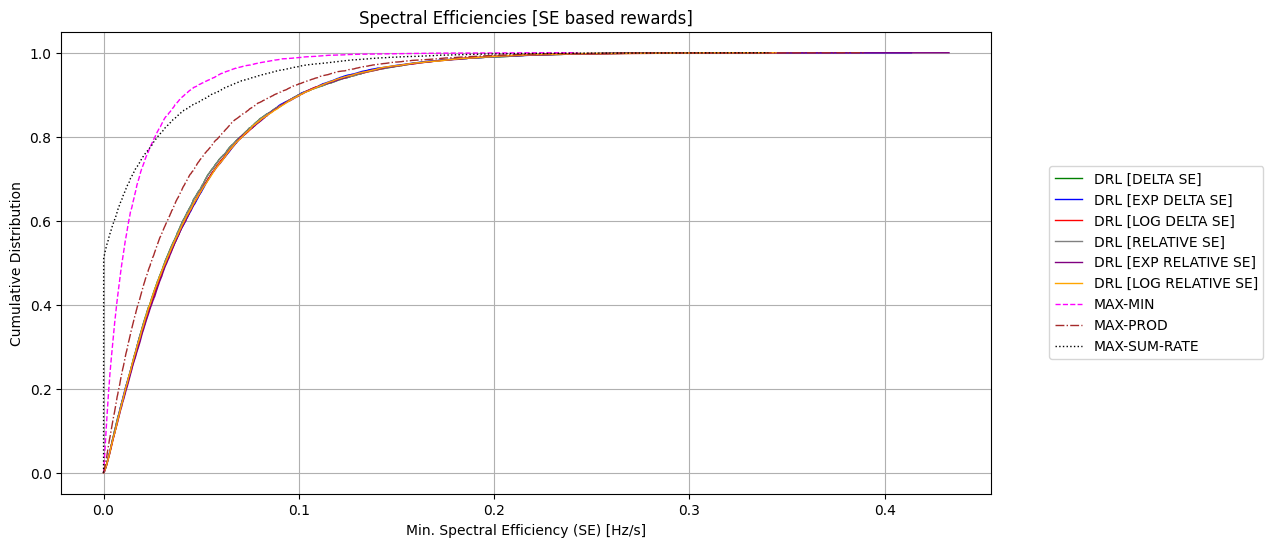

In [21]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

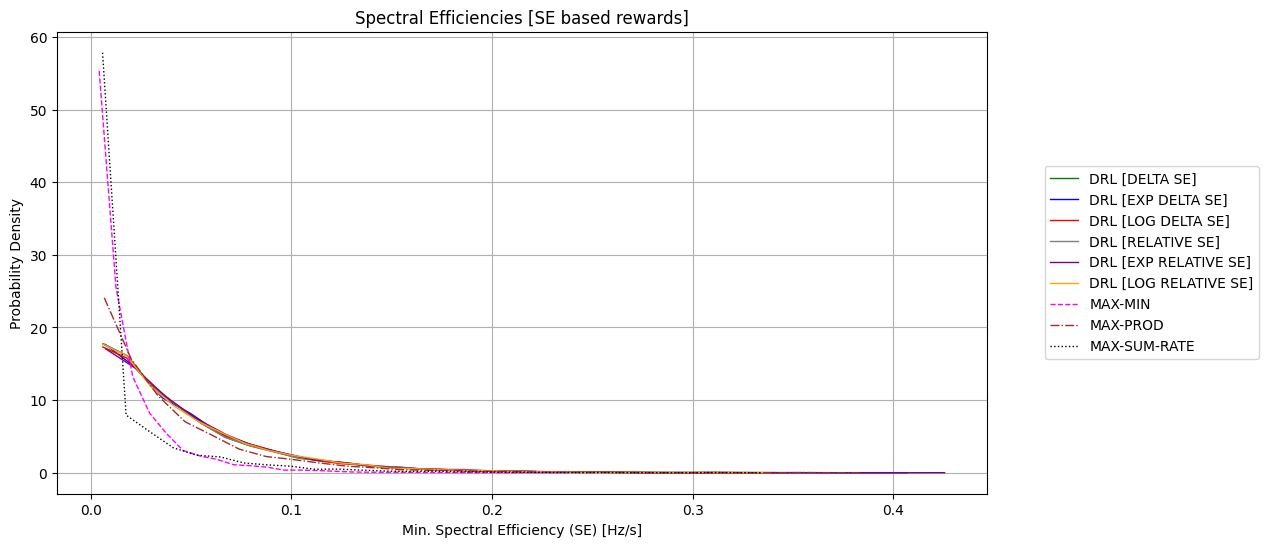

In [22]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

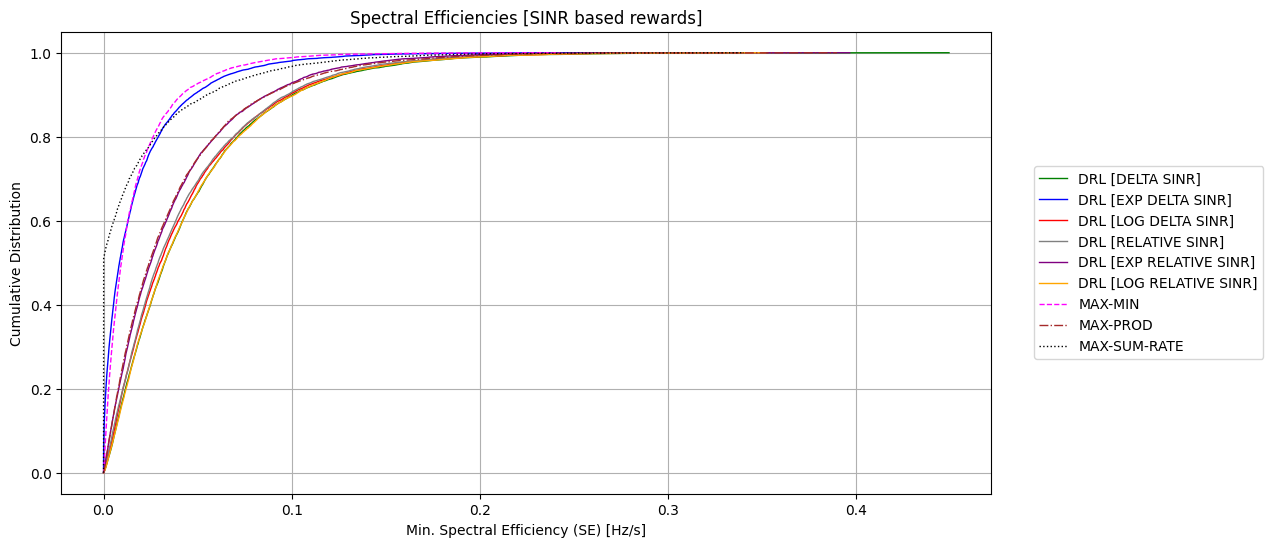

In [23]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

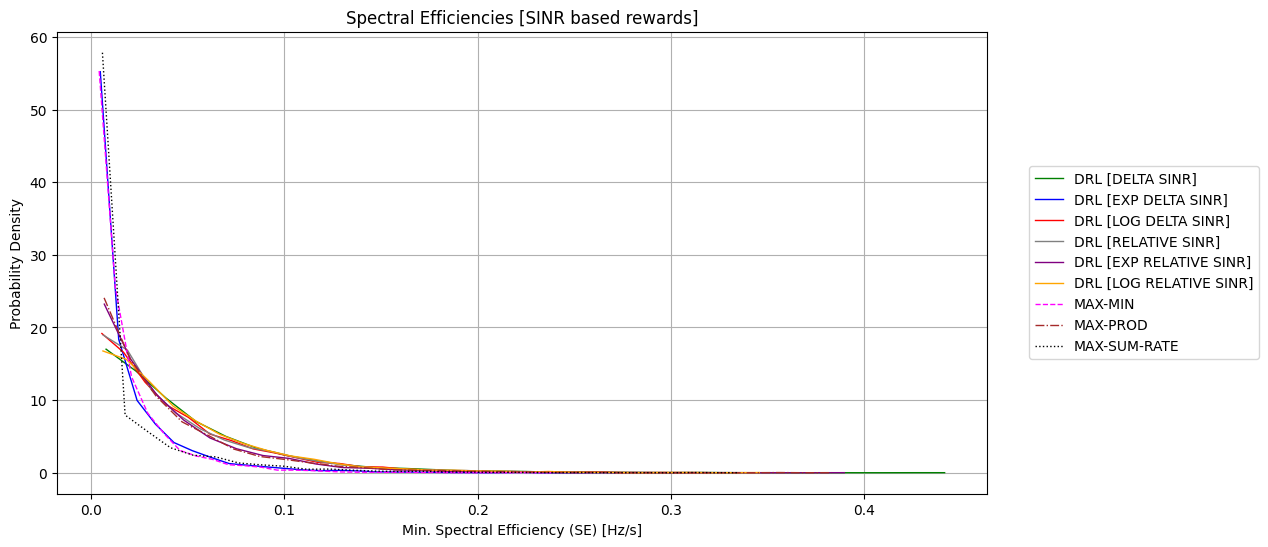

In [24]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

### Max Spectral Efficiencies

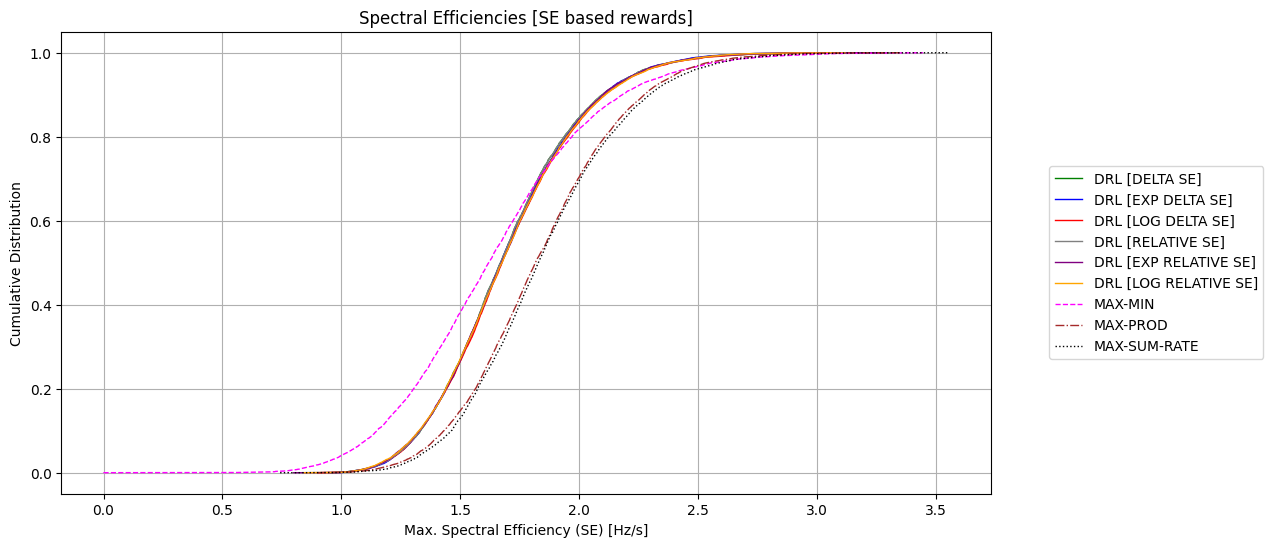

In [25]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

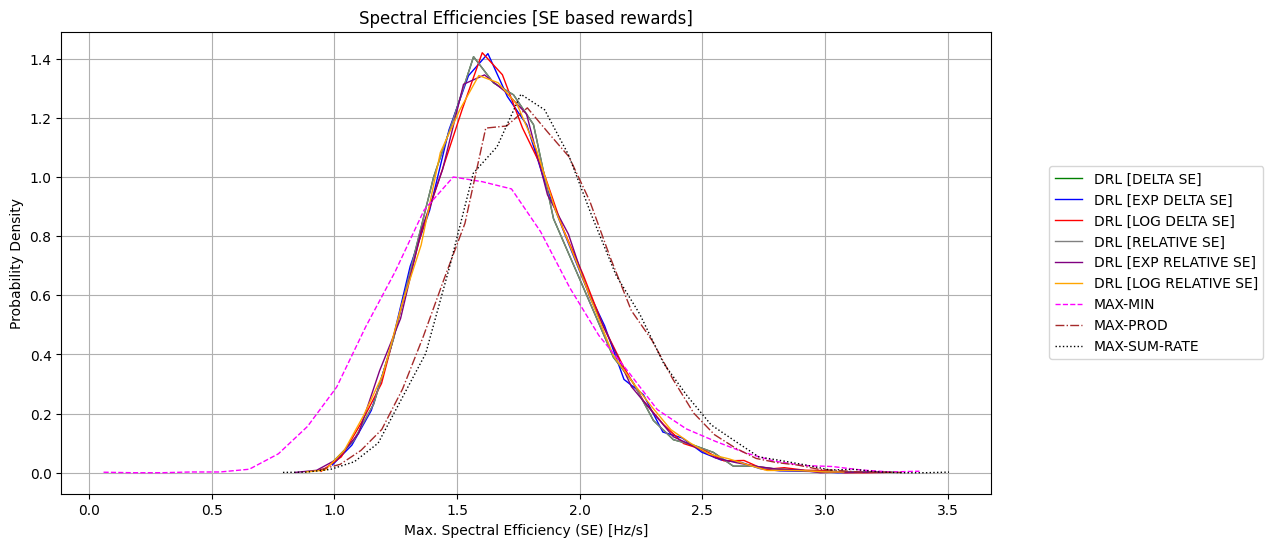

In [26]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

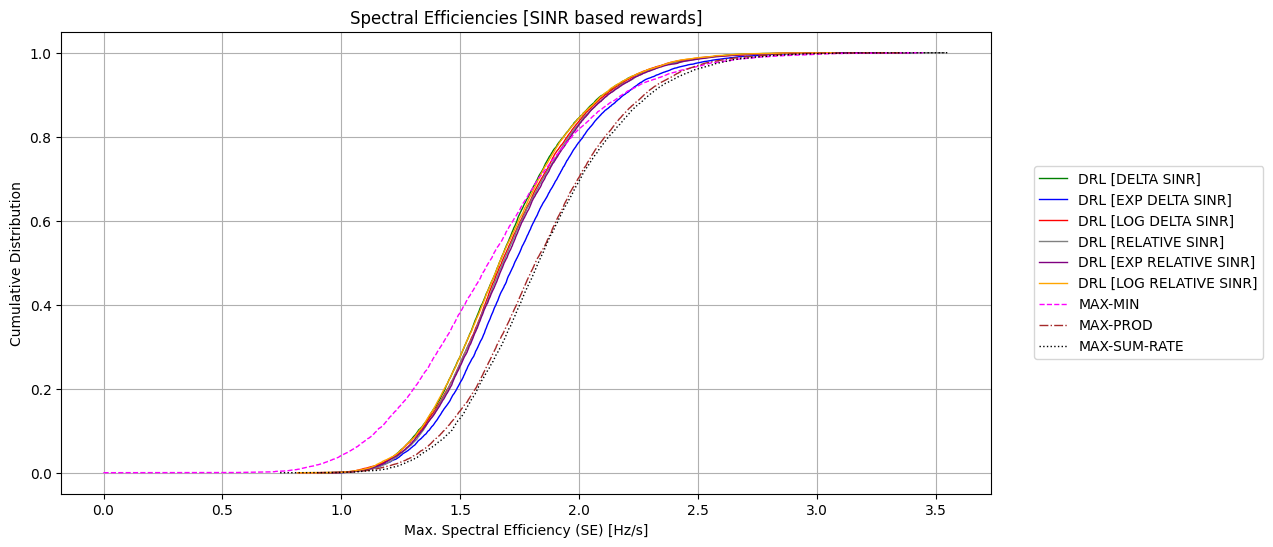

In [27]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

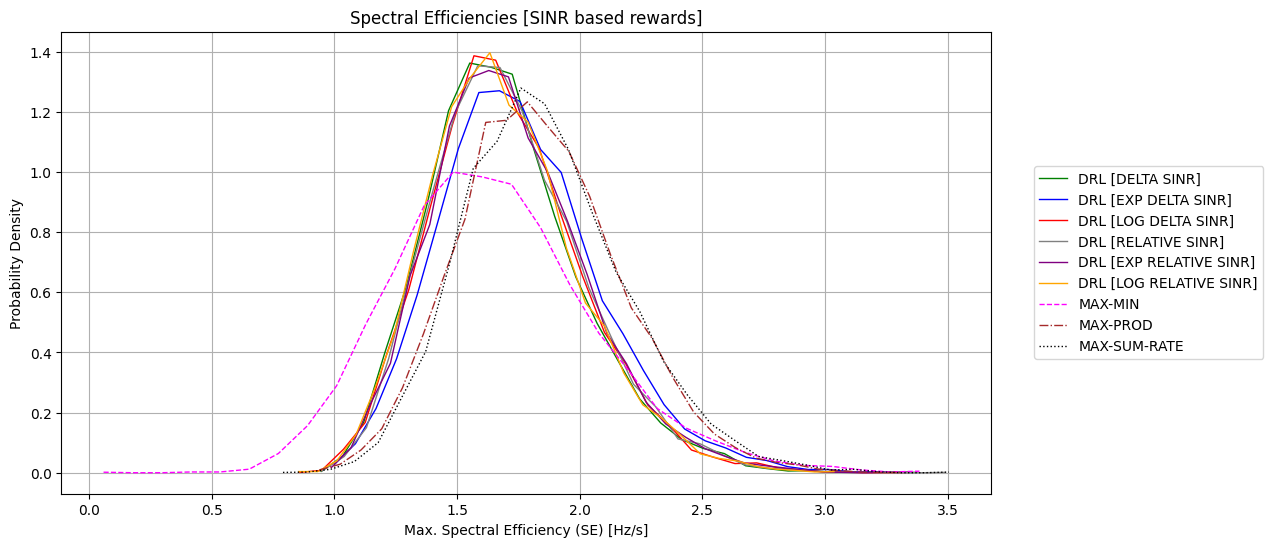

In [28]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

## Sum Spectral Efficiencies

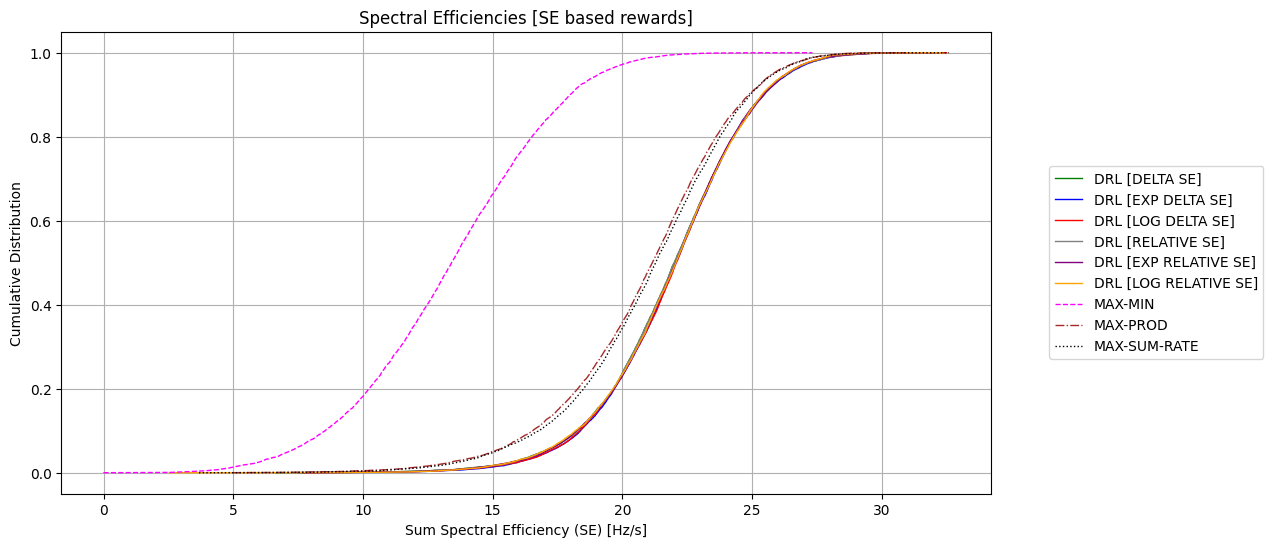

In [29]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

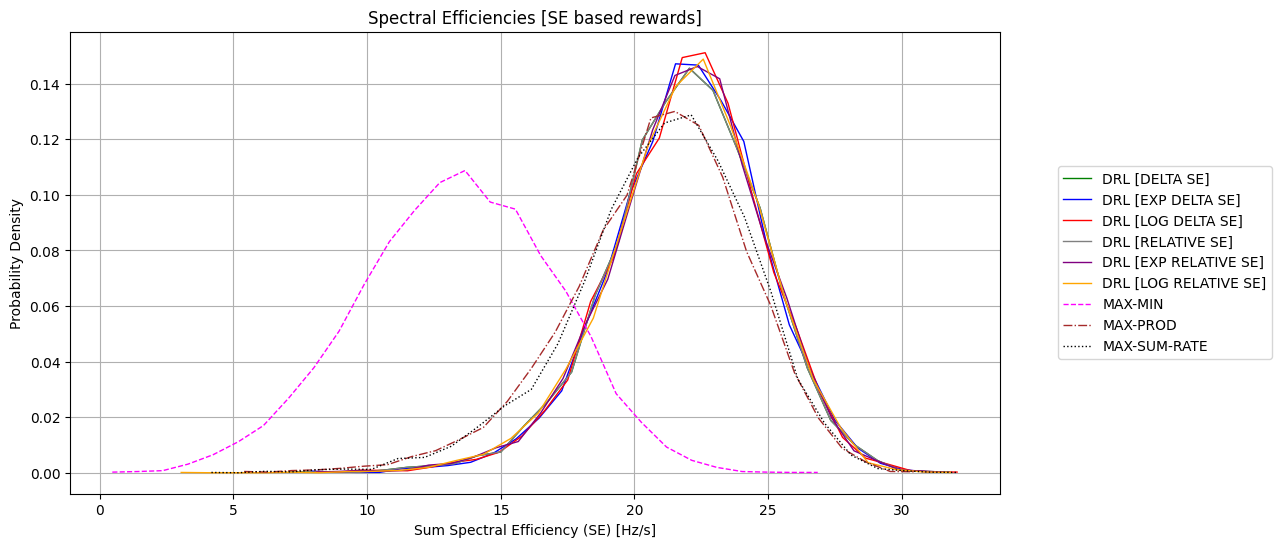

In [30]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

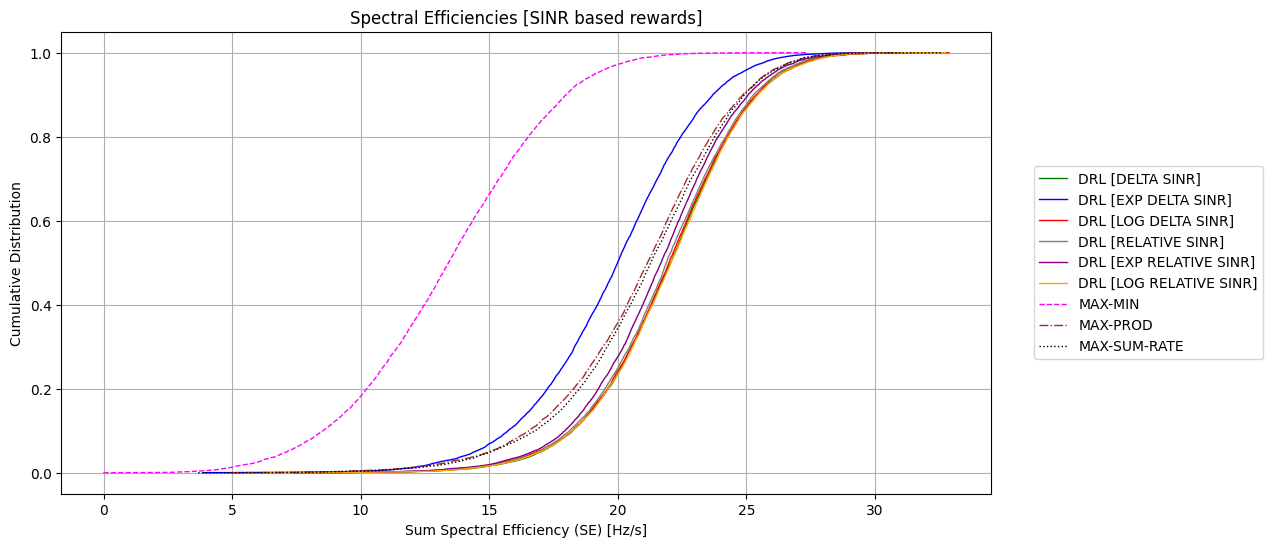

In [31]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

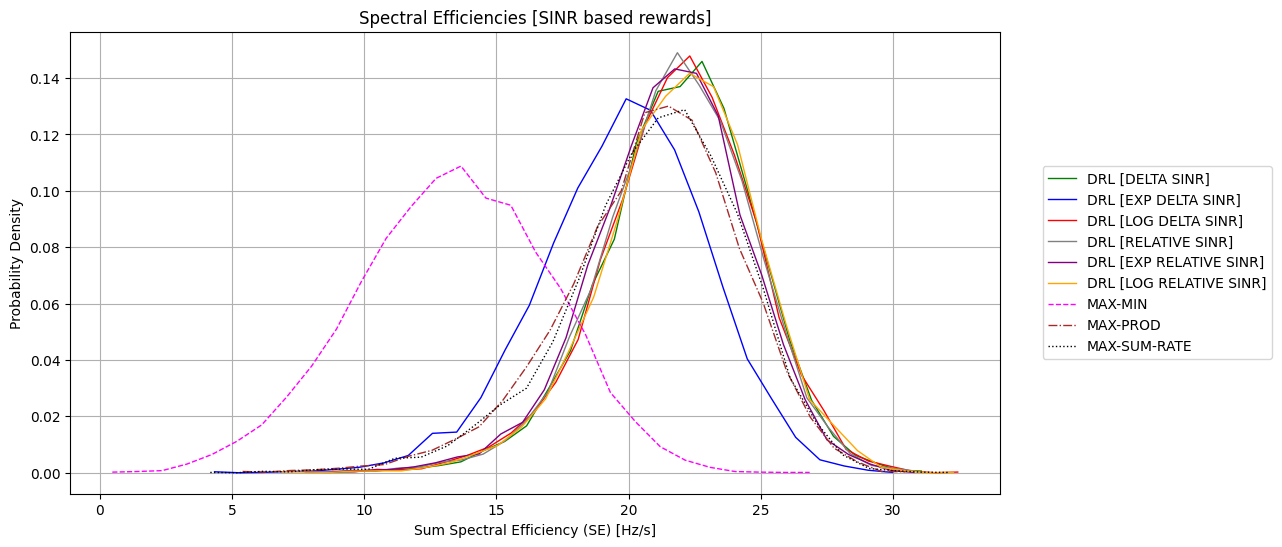

In [32]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

### CDF Comparison

#### SE based reward

In [33]:
compare_models(SE_DATA_R_SE, operation=None, data_label='SE')

Label Average SE    Max SE  \
MODEL_DELTA_SE_SEs                     DRL [DELTA SE]   0.683686  3.319158   
MODEL_EXP_DELTA_CLIP_SE_SEs        DRL [EXP DELTA SE]   0.685706  3.250645   
MODEL_LOG_DELTA_SE_SEs             DRL [LOG DELTA SE]   0.685371  3.286095   
MODEL_RELATIVE_SE_SEs               DRL [RELATIVE SE]   0.683686  3.319158   
MODEL_EXP_RELATIVE_CLIP_SE_SEs  DRL [EXP RELATIVE SE]   0.684582  3.280785   
MODEL_LOG_RELATIVE_SE_SEs       DRL [LOG RELATIVE SE]   0.684102  3.116213   
MAXMIN_SEs                                    MAX-MIN   0.416744  3.444802   
MAXPROD_SEs                                  MAX-PROD   0.651955  3.355298   
SUMRATE_SEs                              MAX-SUM-RATE   0.656791  3.554396   

                               Standard Deviation 25th Percentile  \
MODEL_DELTA_SE_SEs                       0.441702        0.302054   
MODEL_EXP_DELTA_CLIP_SE_SEs              0.442153        0.302725   
MODEL_LOG_DELTA_SE_SEs                   0.442246        0.303351   
MODEL_RELATIVE_SE_SEs                    0.441702        0.302054   
MODEL_EXP_RELATIVE_CLIP_SE_SEs           0.442382        0.301175   
MODEL_LOG_RELATIVE_SE_SEs                0.443269        0.299577   
MAXMIN_SEs                               0.407635        0.115419   
MAXPROD_SEs                              0.472727        0.259221   
SUMRATE_SEs                              0.489324        0.243395   

                               50th Percentile 75th Percentile  
MODEL_DELTA_SE_SEs                    0.677655        0.994225  
MODEL_EXP_DELTA_CLIP_SE_SEs           0.681679        0.995004  
MODEL_LOG_DELTA_SE_SEs                0.678745         0.99475  
MODEL_RELATIVE_SE_SEs                 0.677655        0.994225  
MODEL_EXP_RELATIVE_CLIP_SE_SEs        0.677875        0.995143  
MODEL_LOG_RELATIVE_SE_SEs             0.678554        0.995262  
MAXMIN_SEs                            0.303606        0.574473  
MAXPROD_SEs                           0.586954        0.948517  
SUMRATE_SEs                           0.597213        0.969147

In [34]:
ks_results_r_se = compare_cdfs_ks(SE_DATA_R_SE, operation=None)

In [35]:
ks_results_r_se['Best Model']

Criteria      Best Model
0       KS Statistic  DRL [DELTA SE]
1            P-Value  DRL [DELTA SE]
2  Area Between CDFs  DRL [DELTA SE]

In [36]:
ks_results_r_se['Details']

Model1                 Model2  KS Statistic        P-Value  \
0          DRL [DELTA SE]     DRL [EXP DELTA SE]      0.003194   7.630225e-02   
1          DRL [DELTA SE]     DRL [LOG DELTA SE]      0.002188   4.275528e-01   
2          DRL [DELTA SE]      DRL [RELATIVE SE]      0.000000   1.000000e+00   
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]      0.001997   5.454995e-01   
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]      0.002322   3.537391e-01   
5          DRL [DELTA SE]                MAX-MIN      0.317616   0.000000e+00   
6          DRL [DELTA SE]               MAX-PROD      0.062675   0.000000e+00   
7          DRL [DELTA SE]           MAX-SUM-RATE      0.052622   0.000000e+00   
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]      0.002022   5.293034e-01   
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]      0.003194   7.630225e-02   
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]      0.002703   1.924820e-01   
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]      0.002903   1.345126e-01   
12     DRL [EXP DELTA SE]                MAX-MIN      0.319241   0.000000e+00   
13     DRL [EXP DELTA SE]               MAX-PROD      0.065119   0.000000e+00   
14     DRL [EXP DELTA SE]           MAX-SUM-RATE      0.054581   0.000000e+00   
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]      0.002188   4.275528e-01   
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]      0.002281   3.751455e-01   
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]      0.003197   7.581610e-02   
18     DRL [LOG DELTA SE]                MAX-MIN      0.318600   0.000000e+00   
19     DRL [LOG DELTA SE]               MAX-PROD      0.063638   0.000000e+00   
20     DRL [LOG DELTA SE]           MAX-SUM-RATE      0.053487   0.000000e+00   
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]      0.001997   5.454995e-01   
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]      0.002322   3.537391e-01   
23      DRL [RELATIVE SE]                MAX-MIN      0.317616   0.000000e+00   
24      DRL [RELATIVE SE]               MAX-PROD      0.062675   0.000000e+00   
25      DRL [RELATIVE SE]           MAX-SUM-RATE      0.052622   0.000000e+00   
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]      0.002138   4.571281e-01   
27  DRL [EXP RELATIVE SE]                MAX-MIN      0.317528   0.000000e+00   
28  DRL [EXP RELATIVE SE]               MAX-PROD      0.063181   0.000000e+00   
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE      0.052859   0.000000e+00   
30  DRL [LOG RELATIVE SE]                MAX-MIN      0.317584   0.000000e+00   
31  DRL [LOG RELATIVE SE]               MAX-PROD      0.063300   0.000000e+00   
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE      0.052562   0.000000e+00   
33                MAX-MIN               MAX-PROD      0.262522   0.000000e+00   
34                MAX-MIN           MAX-SUM-RATE      0.266428   0.000000e+00   
35               MAX-PROD           MAX-SUM-RATE      0.029091  4.588656e-118   

    Area Between CDFs  
0            0.002071  
1            0.001691  
2            0.000000  
3            0.001167  
4            0.001457  
5            0.268368  
6            0.057552  
7            0.062267  
8            0.000988  
9            0.002072  
10           0.001427  
11           0.001981  
12           0.270371  
13           0.058804  
14           0.063369  
15           0.001691  
16           0.001075  
17           0.001571  
18           0.269851  
19           0.058275  
20           0.062900  
21           0.001167  
22           0.001457  
23           0.268368  
24           0.057552  
25           0.062267  
26           0.000961  
27           0.269208  
28           0.057678  
29           0.062281  
30           0.268632  
31           0.056972  
32           0.061577  
33           0.235344  
34           0.240413  
35           0.018394

In [37]:
emd_results_r_se = compare_cdfs_emd(SE_DATA_R_SE, operation=None)

In [38]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0         DRL [DELTA SE]     0.049322
1      DRL [RELATIVE SE]     0.049322
2  DRL [LOG RELATIVE SE]     0.049327
3  DRL [EXP RELATIVE SE]     0.049371
4     DRL [LOG DELTA SE]     0.049755
5     DRL [EXP DELTA SE]     0.050136
6               MAX-PROD     0.075071
7           MAX-SUM-RATE     0.079184
8                MAX-MIN     0.261319

In [39]:
emd_results_r_se['Details']

Model1                 Model2  EMD Value
0          DRL [DELTA SE]     DRL [EXP DELTA SE]   0.002072
1          DRL [DELTA SE]     DRL [LOG DELTA SE]   0.001691
2          DRL [DELTA SE]      DRL [RELATIVE SE]   0.000000
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]   0.001167
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]   0.001458
5          DRL [DELTA SE]                MAX-MIN   0.268368
6          DRL [DELTA SE]               MAX-PROD   0.057552
7          DRL [DELTA SE]           MAX-SUM-RATE   0.062267
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]   0.000988
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]   0.002072
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]   0.001427
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]   0.001982
12     DRL [EXP DELTA SE]                MAX-MIN   0.270372
13     DRL [EXP DELTA SE]               MAX-PROD   0.058804
14     DRL [EXP DELTA SE]           MAX-SUM-RATE   0.063370
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]   0.001691
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]   0.001074
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]   0.001571
18     DRL [LOG DELTA SE]                MAX-MIN   0.269851
19     DRL [LOG DELTA SE]               MAX-PROD   0.058276
20     DRL [LOG DELTA SE]           MAX-SUM-RATE   0.062901
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]   0.001167
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]   0.001458
23      DRL [RELATIVE SE]                MAX-MIN   0.268368
24      DRL [RELATIVE SE]               MAX-PROD   0.057552
25      DRL [RELATIVE SE]           MAX-SUM-RATE   0.062267
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]   0.000962
27  DRL [EXP RELATIVE SE]                MAX-MIN   0.269208
28  DRL [EXP RELATIVE SE]               MAX-PROD   0.057678
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE   0.062281
30  DRL [LOG RELATIVE SE]                MAX-MIN   0.268632
31  DRL [LOG RELATIVE SE]               MAX-PROD   0.056972
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE   0.061578
33                MAX-MIN               MAX-PROD   0.235344
34                MAX-MIN           MAX-SUM-RATE   0.240412
35               MAX-PROD           MAX-SUM-RATE   0.018394

In [144]:
moments_r_se = compare_cdfs_moments(SE_DATA_R_SE, operation=None, criteria='mean')

In [145]:
moments_r_se['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SE_SEs     1
2          MODEL_LOG_DELTA_SE_SEs     2
4  MODEL_EXP_RELATIVE_CLIP_SE_SEs     3
5       MODEL_LOG_RELATIVE_SE_SEs     4
0              MODEL_DELTA_SE_SEs     5
3           MODEL_RELATIVE_SE_SEs     6
8                     SUMRATE_SEs     7
7                     MAXPROD_SEs     8
6                      MAXMIN_SEs     9

In [42]:
moments_r_se['Details']

Model      Mean  Variance  Skewness  Kurtosis
0              MODEL_DELTA_SE_SEs  0.683686  0.195100  0.458602 -0.067325
1     MODEL_EXP_DELTA_CLIP_SE_SEs  0.685706  0.195499  0.451940 -0.086846
2          MODEL_LOG_DELTA_SE_SEs  0.685371  0.195582  0.464017 -0.046769
3           MODEL_RELATIVE_SE_SEs  0.683686  0.195100  0.458602 -0.067325
4  MODEL_EXP_RELATIVE_CLIP_SE_SEs  0.684582  0.195702  0.459881 -0.076614
5       MODEL_LOG_RELATIVE_SE_SEs  0.684102  0.196488  0.461345 -0.071625
6                      MAXMIN_SEs  0.416744  0.166167  1.721379  3.671594
7                     MAXPROD_SEs  0.651955  0.223471  0.806636  0.491796
8                     SUMRATE_SEs  0.656791  0.239438  0.736616  0.302316

In [43]:
calculate_and_rank_percentiles(SE_DATA_R_SE, [50, 75])

Model  50th Percentile  75th Percentile  Rank
5  DRL [LOG RELATIVE SE]         0.678554         0.995262     1
4  DRL [EXP RELATIVE SE]         0.677875         0.995143     2
1     DRL [EXP DELTA SE]         0.681679         0.995004     3
2     DRL [LOG DELTA SE]         0.678745         0.994750     4
0         DRL [DELTA SE]         0.677655         0.994225     5
3      DRL [RELATIVE SE]         0.677655         0.994225     5
8           MAX-SUM-RATE         0.597213         0.969147     7
7               MAX-PROD         0.586954         0.948517     8
6                MAX-MIN         0.303606         0.574473     9

#### SINR based reward

In [44]:
compare_models(SE_DATA_R_SINR, operation=None, data_label='SE')

Label Average SE  \
MODEL_DELTA_SINR_SEs                     DRL [DELTA SINR]   0.683898   
MODEL_EXP_DELTA_CLIP_SINR_SEs        DRL [EXP DELTA SINR]   0.619211   
MODEL_LOG_DELTA_SINR_SEs             DRL [LOG DELTA SINR]   0.682924   
MODEL_RELATIVE_SINR_SEs               DRL [RELATIVE SINR]   0.680396   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  DRL [EXP RELATIVE SINR]   0.673054   
MODEL_LOG_RELATIVE_SINR_SEs       DRL [LOG RELATIVE SINR]   0.684942   
MAXMIN_SEs                                        MAX-MIN   0.416744   
MAXPROD_SEs                                      MAX-PROD   0.651955   
SUMRATE_SEs                                  MAX-SUM-RATE   0.656791   

                                    Max SE Standard Deviation 25th Percentile  \
MODEL_DELTA_SINR_SEs              3.412243           0.440906        0.302404   
MODEL_EXP_DELTA_CLIP_SINR_SEs      3.39295           0.487019        0.168878   
MODEL_LOG_DELTA_SINR_SEs          3.387074           0.444946        0.297182   
MODEL_RELATIVE_SINR_SEs           3.535097           0.446466        0.292705   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  3.273646           0.452057         0.27568   
MODEL_LOG_RELATIVE_SINR_SEs       3.076059           0.441795        0.303198   
MAXMIN_SEs                        3.444802           0.407635        0.115419   
MAXPROD_SEs                       3.355298           0.472727        0.259221   
SUMRATE_SEs                       3.554396           0.489324        0.243395   

                                 50th Percentile 75th Percentile  
MODEL_DELTA_SINR_SEs                    0.678814        0.994008  
MODEL_EXP_DELTA_CLIP_SINR_SEs           0.568867        0.984184  
MODEL_LOG_DELTA_SINR_SEs                0.676008        0.995683  
MODEL_RELATIVE_SINR_SEs                 0.672829        0.994103  
MODEL_EXP_RELATIVE_CLIP_SINR_SEs        0.660351        0.993372  
MODEL_LOG_RELATIVE_SINR_SEs              0.67975        0.994711  
MAXMIN_SEs                              0.303606        0.574473  
MAXPROD_SEs                             0.586954        0.948517  
SUMRATE_SEs                             0.597213        0.969147

In [45]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SE_DATA_R_SINR, operation=None)

In [46]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.101653   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.004797   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.008841   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.020231   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002244   
5          DRL [DELTA SINR]                  MAX-MIN      0.317900   
6          DRL [DELTA SINR]                 MAX-PROD      0.063456   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.053378   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.097338   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.093578   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.082472   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.100794   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.250331   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.075531   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.058412   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.004541   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.015834   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.005003   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.315384   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.061419   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.050747   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.012572   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.008447   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.312741   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.060356   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.049059   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.020044   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.303481   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.054425   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.041112   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.318556   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.064475   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.053681   
33                  MAX-MIN                 MAX-PROD      0.262522   
34                  MAX-MIN             MAX-SUM-RATE      0.266428   
35                 MAX-PROD             MAX-SUM-RATE      0.029091   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.074805  
1    1.264244e-03           0.004124  
2    2.732349e-11           0.005998  
3    2.555280e-57           0.014861  
4    3.956140e-01           0.001360  
5    0.000000e+00           0.268548  
6    0.000000e+00           0.058270  
7    0.000000e+00           0.062966  
8    0.000000e+00           0.071676  
9    0.000000e+00           0.068885  
10   0.000000e+00           0.060083  
11   0.000000e+00           0.074988  
12   0.000000e+00           0.203477  
13   0.000000e+00           0.047470  
14   0.000000e+00           0.041744  
15   2.719169e-03           0.003001  
16   2.817728e-35           0.011599  
17   6.620134e-04           0.003749  
18   0.000000e+00           0.267391  
19   0.000000e+00           0.055045  
20   0.000000e+00           0.059590  
21   2.145297e-22           0.008883  
22   2.413634e-10           0.006146  
23   0.000000e+00           0.264733  
24   0.000000e+00           0.052323  
25   0.000000e+00           0.056983  
26   2.865188e-56           0.015023  
27   0.000000e+00           0.257309  
28   0.000000e+00           0.043467  
29  2.002871e-235           0.048117  
30   0.000000e+00           0.269598  
31   0.000000e+00           0.058452  
32   0.000000e+00           0.063123  
33   0.000000e+00           0.235344  
34   0.000000e+00           0.240413  
35  4.588656e-118         

In [47]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.101653   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.004797   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.008841   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.020231   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002244   
5          DRL [DELTA SINR]                  MAX-MIN      0.317900   
6          DRL [DELTA SINR]                 MAX-PROD      0.063456   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.053378   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.097338   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.093578   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.082472   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.100794   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.250331   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.075531   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.058412   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.004541   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.015834   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.005003   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.315384   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.061419   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.050747   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.012572   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.008447   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.312741   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.060356   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.049059   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.020044   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.303481   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.054425   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.041112   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.318556   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.064475   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.053681   
33                  MAX-MIN                 MAX-PROD      0.262522   
34                  MAX-MIN             MAX-SUM-RATE      0.266428   
35                 MAX-PROD             MAX-SUM-RATE      0.029091   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.074805  
1    1.264244e-03           0.004124  
2    2.732349e-11           0.005998  
3    2.555280e-57           0.014861  
4    3.956140e-01           0.001360  
5    0.000000e+00           0.268548  
6    0.000000e+00           0.058270  
7    0.000000e+00           0.062966  
8    0.000000e+00           0.071676  
9    0.000000e+00           0.068885  
10   0.000000e+00           0.060083  
11   0.000000e+00           0.074988  
12   0.000000e+00           0.203477  
13   0.000000e+00           0.047470  
14   0.000000e+00           0.041744  
15   2.719169e-03           0.003001  
16   2.817728e-35           0.011599  
17   6.620134e-04           0.003749  
18   0.000000e+00           0.267391  
19   0.000000e+00           0.055045  
20   0.000000e+00           0.059590  
21   2.145297e-22           0.008883  
22   2.413634e-10           0.006146  
23   0.000000e+00           0.264733  
24   0.000000e+00           0.052323  
25   0.000000e+00           0.056983  
26   2.865188e-56           0.015023  
27   0.000000e+00           0.257309  
28   0.000000e+00           0.043467  
29  2.002871e-235           0.048117  
30   0.000000e+00           0.269598  
31   0.000000e+00           0.058452  
32   0.000000e+00           0.063123  
33   0.000000e+00           0.235344  
34   0.000000e+00           0.240413  
35  4.588656e-118         

In [48]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SE_DATA_R_SINR, operation=None)

In [49]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.057418
1      DRL [RELATIVE SINR]     0.058369
2     DRL [LOG DELTA SINR]     0.059522
3         DRL [DELTA SINR]     0.061367
4  DRL [LOG RELATIVE SINR]     0.061556
5                 MAX-PROD     0.071096
6             MAX-SUM-RATE     0.073917
7     DRL [EXP DELTA SINR]     0.080391
8                  MAX-MIN     0.250852

In [50]:
emd_results_r_sinr['Details']

Model1                   Model2  EMD Value
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]   0.074805
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]   0.004124
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]   0.005997
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]   0.014862
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]   0.001362
5          DRL [DELTA SINR]                  MAX-MIN   0.268548
6          DRL [DELTA SINR]                 MAX-PROD   0.058270
7          DRL [DELTA SINR]             MAX-SUM-RATE   0.062966
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]   0.071675
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]   0.068885
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]   0.060083
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]   0.074990
12     DRL [EXP DELTA SINR]                  MAX-MIN   0.203477
13     DRL [EXP DELTA SINR]                 MAX-PROD   0.047470
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE   0.041744
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]   0.003002
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]   0.011600
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]   0.003750
18     DRL [LOG DELTA SINR]                  MAX-MIN   0.267391
19     DRL [LOG DELTA SINR]                 MAX-PROD   0.055045
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE   0.059591
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]   0.008883
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.006148
23      DRL [RELATIVE SINR]                  MAX-MIN   0.264734
24      DRL [RELATIVE SINR]                 MAX-PROD   0.052323
25      DRL [RELATIVE SINR]             MAX-SUM-RATE   0.056983
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.015024
27  DRL [EXP RELATIVE SINR]                  MAX-MIN   0.257309
28  DRL [EXP RELATIVE SINR]                 MAX-PROD   0.043467
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE   0.048117
30  DRL [LOG RELATIVE SINR]                  MAX-MIN   0.269599
31  DRL [LOG RELATIVE SINR]                 MAX-PROD   0.058452
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE   0.063124
33                  MAX-MIN                 MAX-PROD   0.235344
34                  MAX-MIN             MAX-SUM-RATE   0.240412
35                 MAX-PROD             MAX-SUM-RATE   0.018394

In [146]:
moments_r_sinr = compare_cdfs_moments(SE_DATA_R_SINR, operation=None, criteria='mean')

In [147]:
moments_r_sinr['Ranked Models']

Model  Rank
5       MODEL_LOG_RELATIVE_SINR_SEs     1
0              MODEL_DELTA_SINR_SEs     2
2          MODEL_LOG_DELTA_SINR_SEs     3
3           MODEL_RELATIVE_SINR_SEs     4
4  MODEL_EXP_RELATIVE_CLIP_SINR_SEs     5
8                       SUMRATE_SEs     6
7                       MAXPROD_SEs     7
1     MODEL_EXP_DELTA_CLIP_SINR_SEs     8
6                        MAXMIN_SEs     9

In [53]:
moments_r_sinr['Details']

Model      Mean  Variance  Skewness  Kurtosis
0              MODEL_DELTA_SINR_SEs  0.683898  0.194398  0.458045 -0.058612
1     MODEL_EXP_DELTA_CLIP_SINR_SEs  0.619211  0.237187  0.615810 -0.095093
2          MODEL_LOG_DELTA_SINR_SEs  0.682924  0.197977  0.465875 -0.071651
3           MODEL_RELATIVE_SINR_SEs  0.680396  0.199332  0.475911 -0.055130
4  MODEL_EXP_RELATIVE_CLIP_SINR_SEs  0.673054  0.204356  0.492309 -0.080685
5       MODEL_LOG_RELATIVE_SINR_SEs  0.684942  0.195183  0.454696 -0.078875
6                        MAXMIN_SEs  0.416744  0.166167  1.721379  3.671594
7                       MAXPROD_SEs  0.651955  0.223471  0.806636  0.491796
8                       SUMRATE_SEs  0.656791  0.239438  0.736616  0.302316

In [54]:
calculate_and_rank_percentiles(SE_DATA_R_SINR, [50, 75])

Model  50th Percentile  75th Percentile  Rank
2     DRL [LOG DELTA SINR]         0.676008         0.995683     1
5  DRL [LOG RELATIVE SINR]         0.679750         0.994711     2
3      DRL [RELATIVE SINR]         0.672829         0.994103     3
0         DRL [DELTA SINR]         0.678814         0.994008     4
4  DRL [EXP RELATIVE SINR]         0.660351         0.993372     5
1     DRL [EXP DELTA SINR]         0.568867         0.984184     6
8             MAX-SUM-RATE         0.597213         0.969147     7
7                 MAX-PROD         0.586954         0.948517     8
6                  MAX-MIN         0.303606         0.574473     9

## Area Throughput

In [148]:
MODEL_DELTA_SE_ATHP               = calculate_area_throughput(MODEL_DELTA_SE_SEs              , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SE_ATHP      = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SE_SEs     , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SE_ATHP           = calculate_area_throughput(MODEL_LOG_DELTA_SE_SEs          , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SE_ATHP            = calculate_area_throughput(MODEL_RELATIVE_SE_SEs           , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SE_ATHP   = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SE_SEs  , bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SE_ATHP        = calculate_area_throughput(MODEL_LOG_RELATIVE_SE_SEs       , bandwidth, square_length, 'numpy')
MODEL_DELTA_SINR_ATHP             = calculate_area_throughput(MODEL_DELTA_SINR_SEs            , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SINR_ATHP    = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SINR_SEs   , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SINR_ATHP         = calculate_area_throughput(MODEL_LOG_DELTA_SINR_SEs        , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SINR_ATHP          = calculate_area_throughput(MODEL_RELATIVE_SINR_SEs         , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SINR_ATHP = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SINR_SEs, bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SINR_ATHP      = calculate_area_throughput(MODEL_LOG_RELATIVE_SINR_SEs     , bandwidth, square_length, 'numpy')
MAXMIN_ATHP                       = calculate_area_throughput(MAXMIN_SEs                      , bandwidth, square_length, 'numpy')
MAXPROD_ATHP                      = calculate_area_throughput(MAXPROD_SEs                     , bandwidth, square_length, 'numpy')
SUMRATE_ATHP                      = calculate_area_throughput(SUMRATE_SEs                     , bandwidth, square_length, 'numpy')

In [149]:
ATHP_DATA_R_SE = {
    'MODEL_DELTA_SE_ATHP':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_ATHP,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_ATHP':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_ATHP,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_ATHP':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_ATHP,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_ATHP':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_ATHP,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_ATHP':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_ATHP,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_ATHP':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_ATHP,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

ATHP_DATA_R_SINR = {
    'MODEL_DELTA_SINR_ATHP':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_ATHP,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_ATHP':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_ATHP,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_ATHP':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_ATHP,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_ATHP':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_ATHP,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_ATHP': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_ATHP,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_ATHP':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_ATHP,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

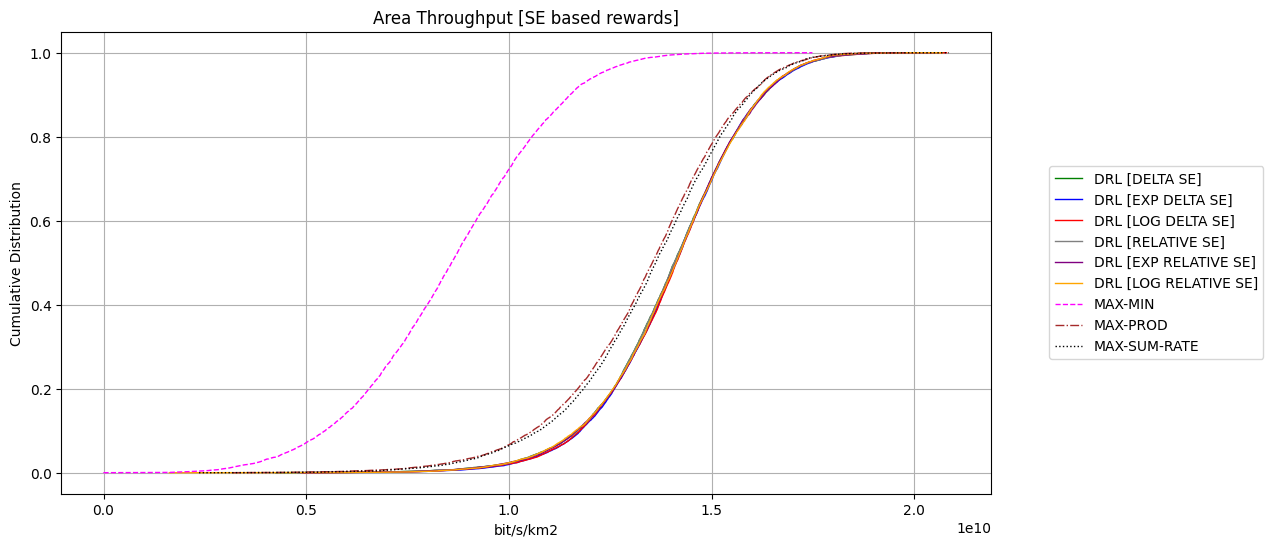

In [150]:
plot_cdf_pdf(data=ATHP_DATA_R_SE, title='Area Throughput [SE based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)

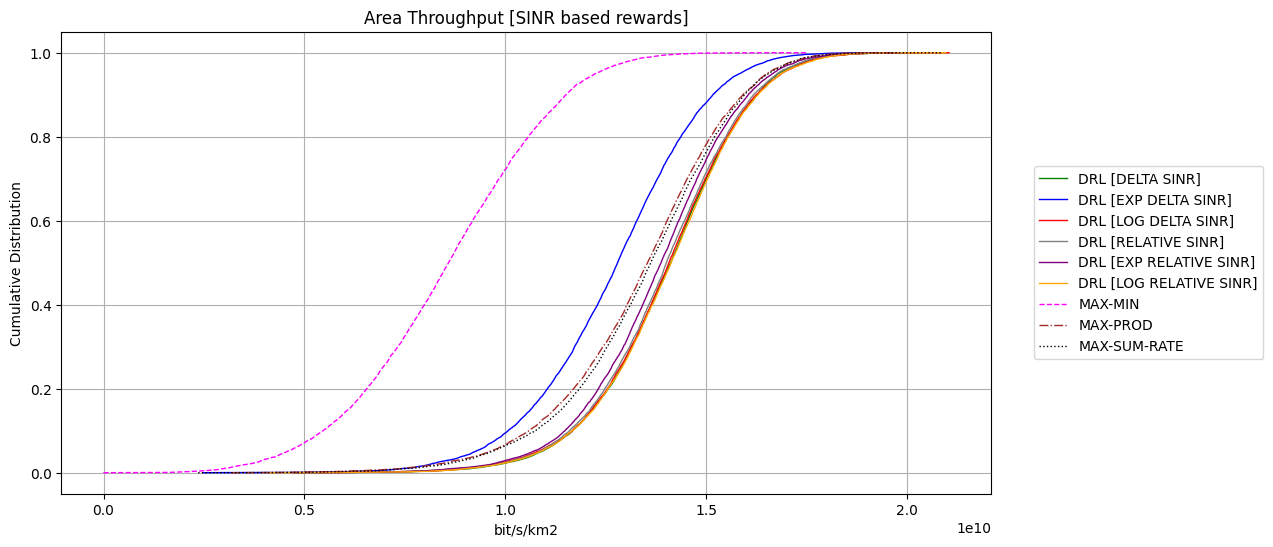

In [151]:
plot_cdf_pdf(data=ATHP_DATA_R_SINR, title='Area Throughput [SINR based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)

## Uplink Power

In [153]:
# load data from csv files
MODEL_DELTA_SE_POWERs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_POWERs.csv', index_col=0)
MODEL_LOG_DELTA_SE_POWERs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_POWERs.csv', index_col=0)
MODEL_RELATIVE_SE_POWERs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_POWERs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_POWERs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_DELTA_SINR_POWERs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_POWERs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_POWERs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_POWERs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_RELATIVE_SINR_POWERs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_POWERs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_POWERs.csv', index_col=0)

MAXMIN_POWERs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_POWERs.csv', index_col=0)
MAXPROD_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_POWERs.csv', index_col=0)
SUMRATE_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_POWERs.csv', index_col=0)

In [154]:
P_DATA_R_SE = {
    'MODEL_DELTA_SE_POWERs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_POWERs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_POWERs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_POWERs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_POWERs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_POWERs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_POWERs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_POWERs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_POWERs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_POWERs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_POWERs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_POWERs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

P_DATA_R_SINR = {
    'MODEL_DELTA_SINR_POWERs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_POWERs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_POWERs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_POWERs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_POWERs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_POWERs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_POWERs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_POWERs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_POWERs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_POWERs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_POWERs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_POWERs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Uplink Power

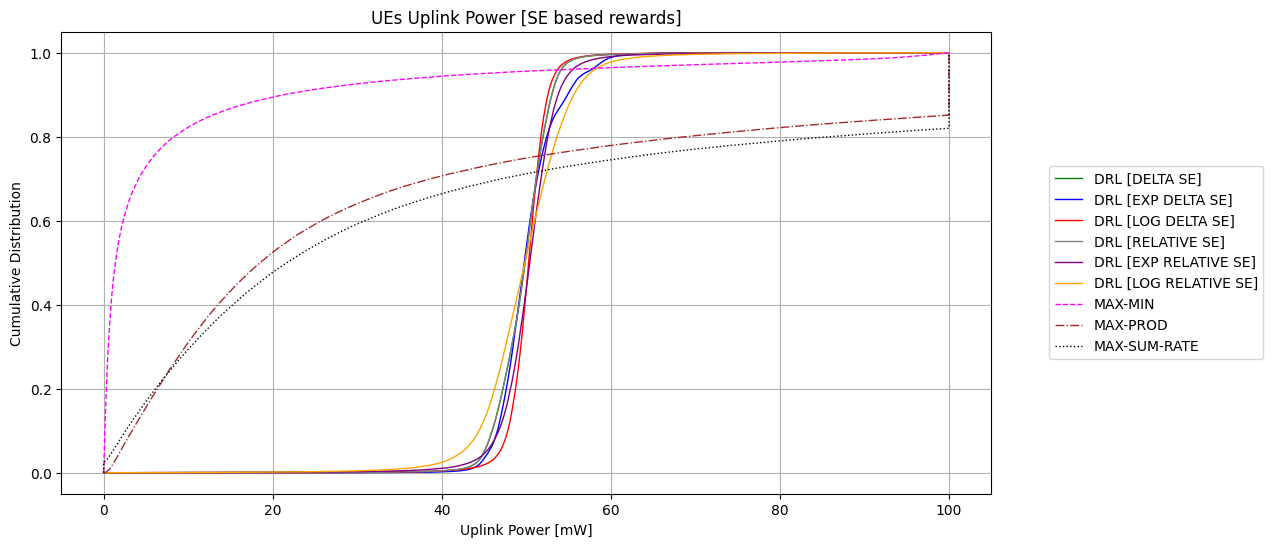

In [155]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True)

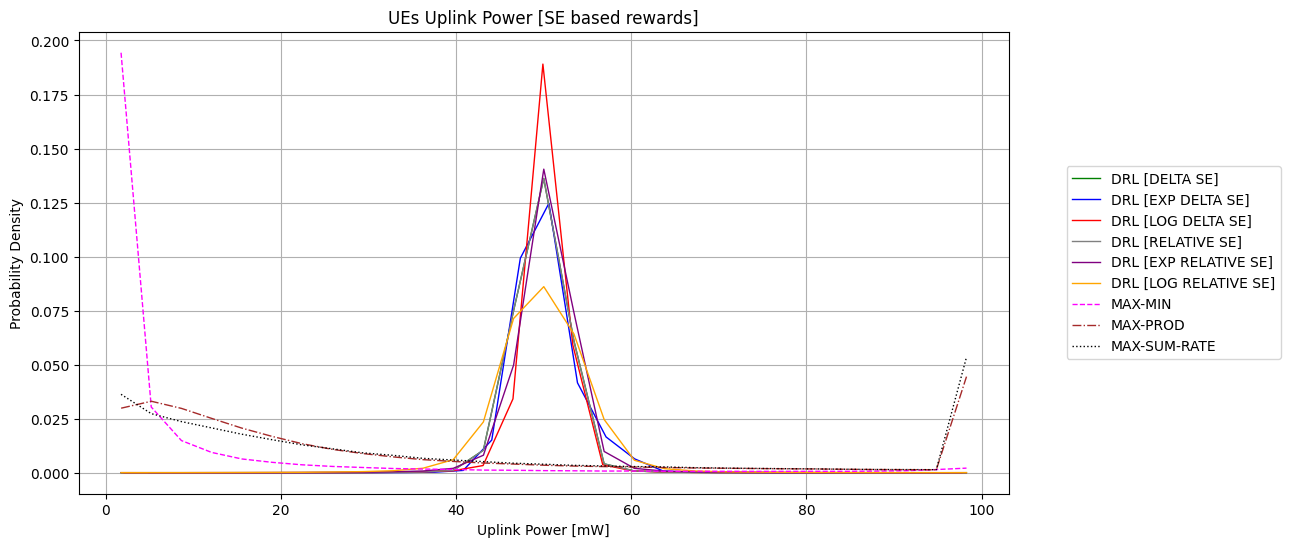

In [156]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False)

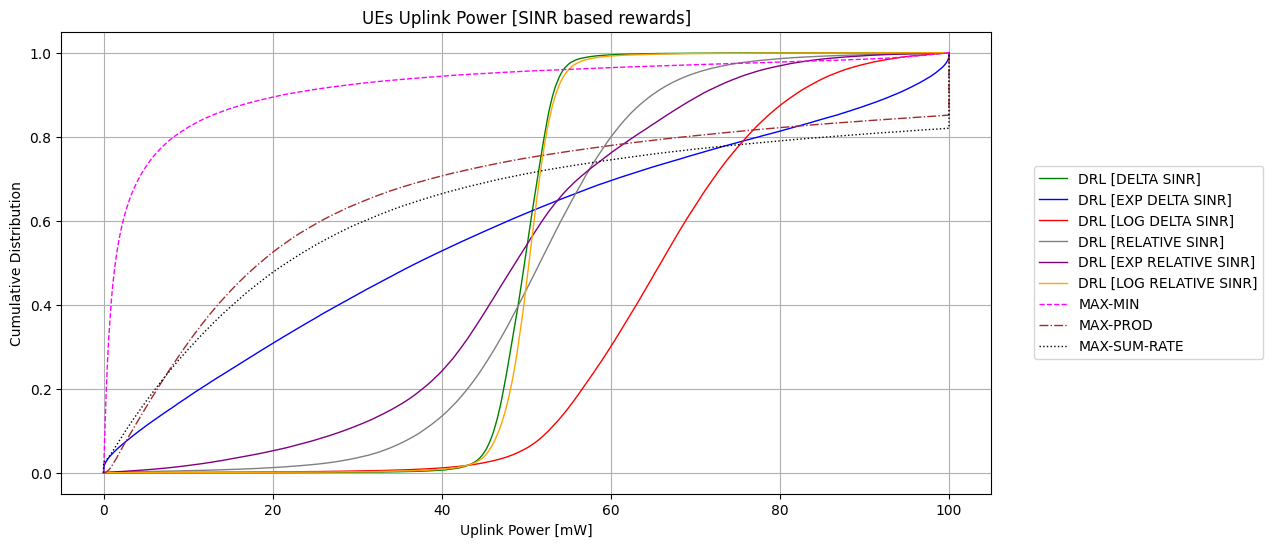

In [157]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True)

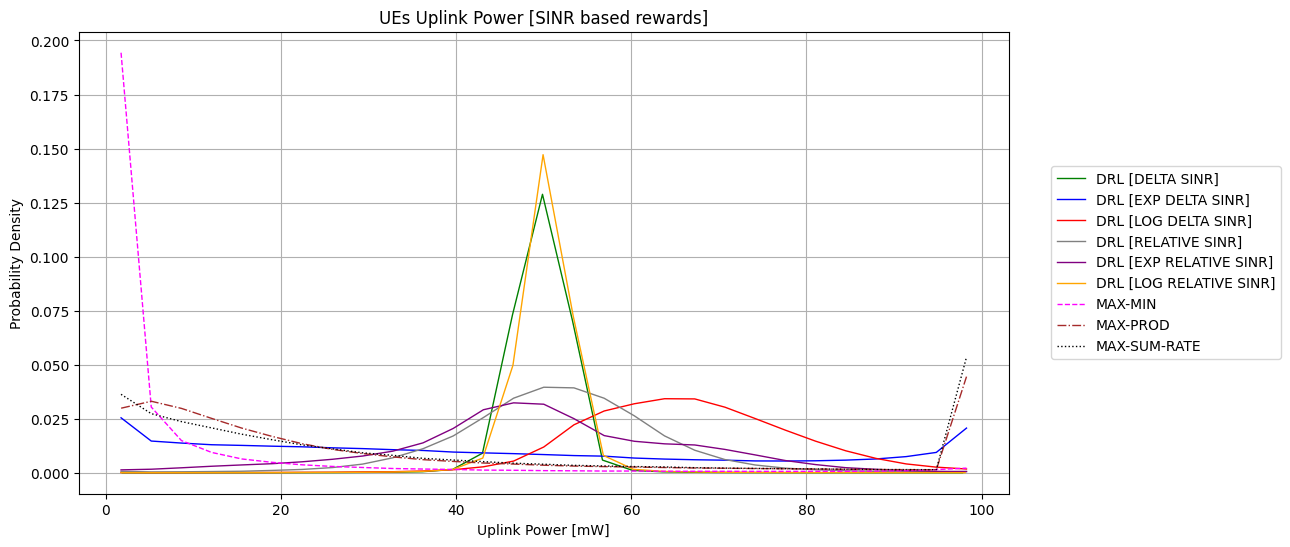

In [158]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False)

### Mean Uplink Power

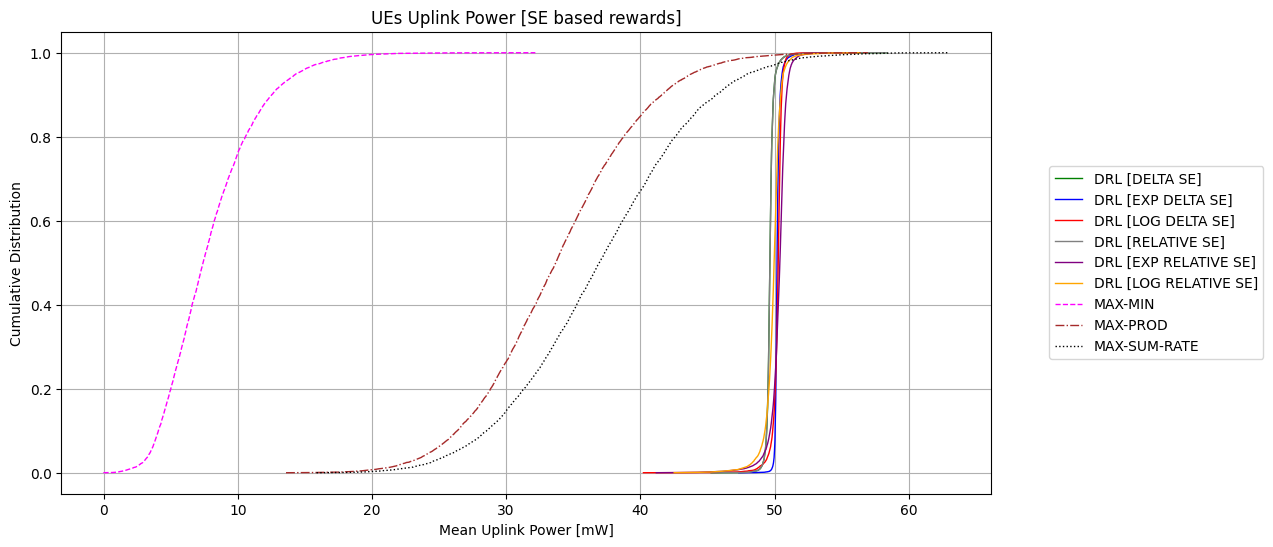

In [159]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True)

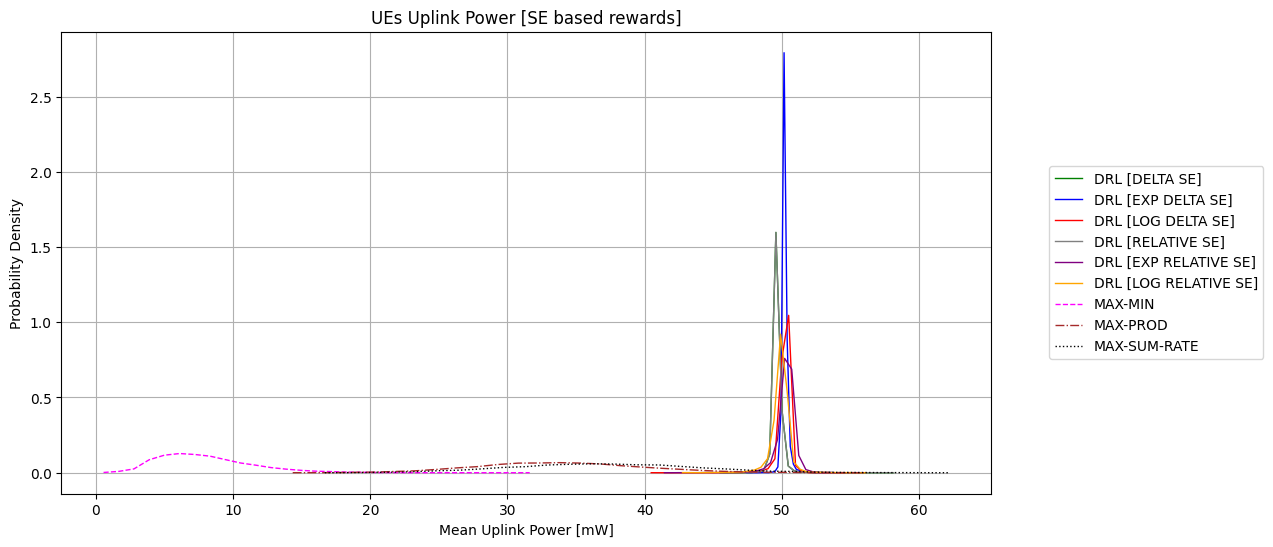

In [160]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False)

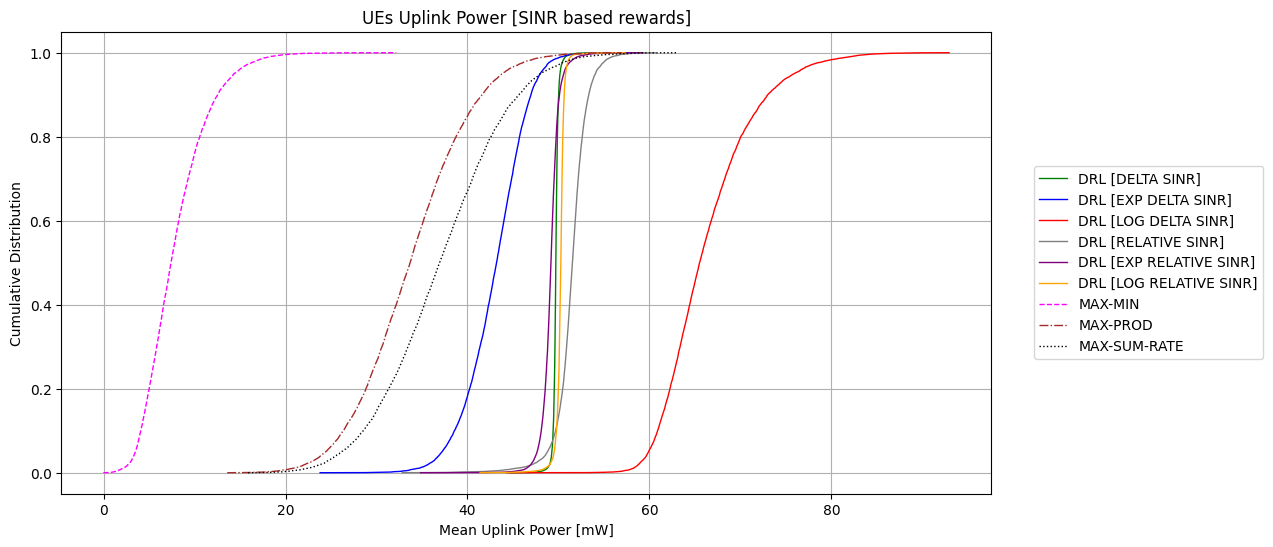

In [161]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True)

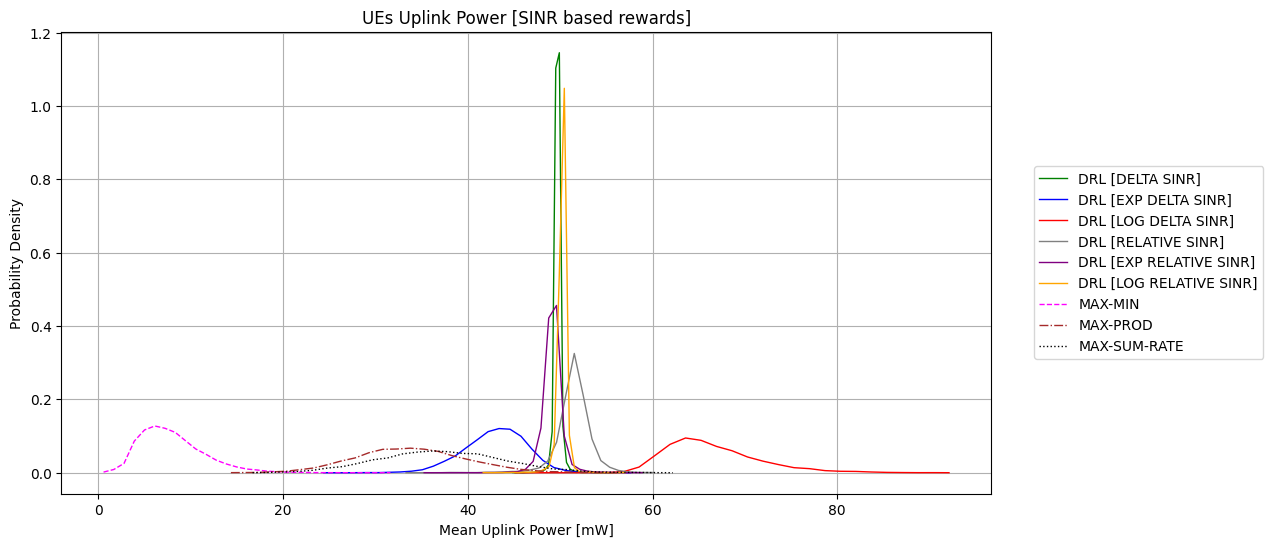

In [162]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False)

### Min Uplink Power

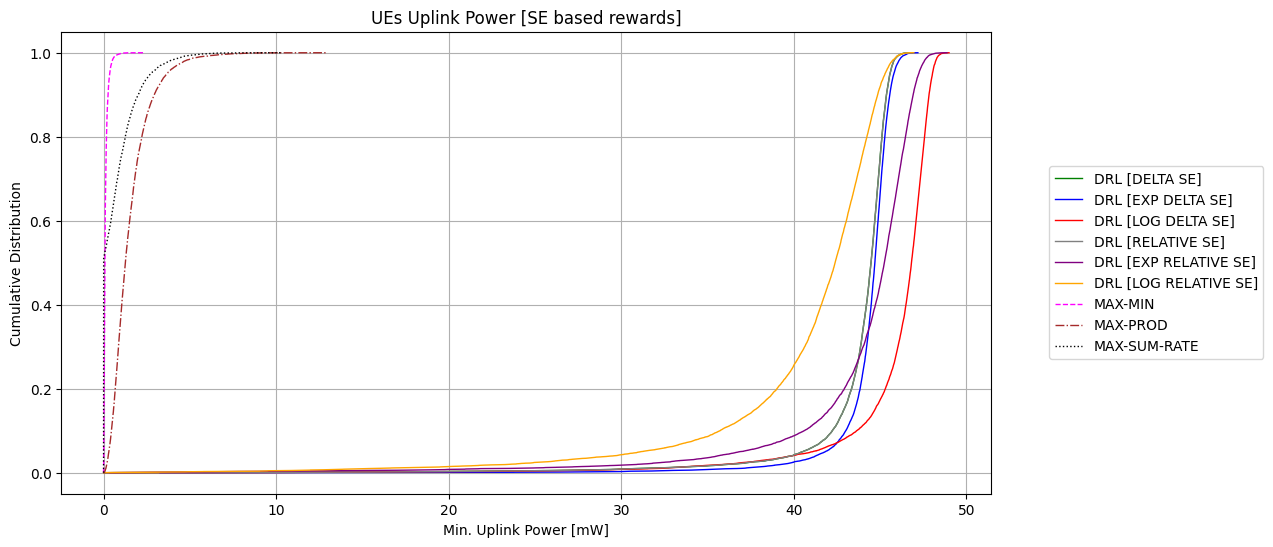

In [163]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=True)

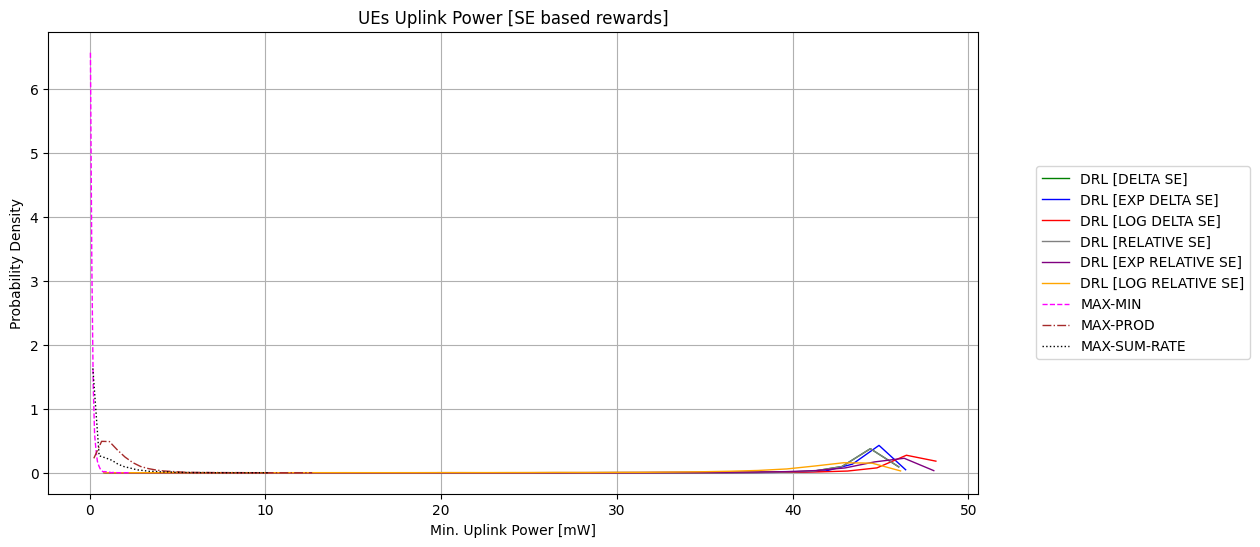

In [164]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=False)

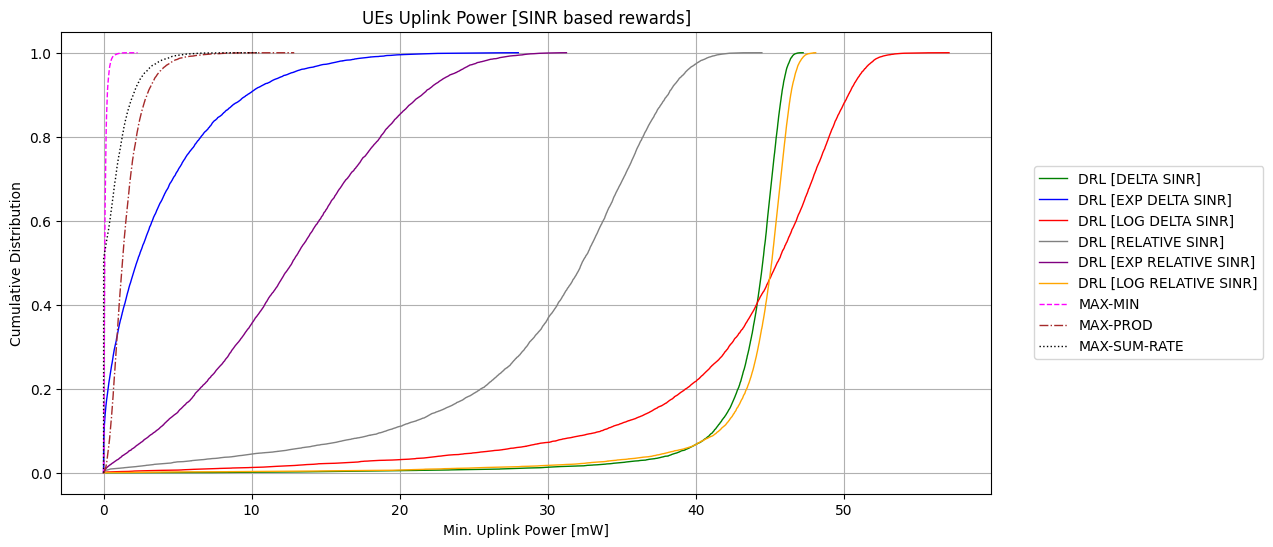

In [165]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=True)

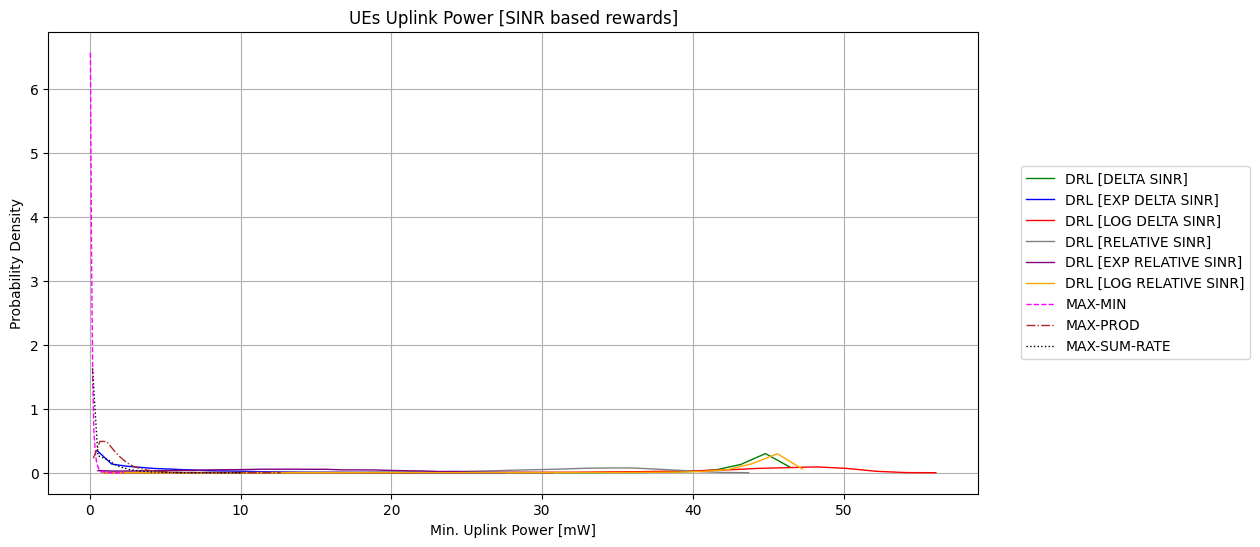

In [166]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=False)

### Max Uplink Power

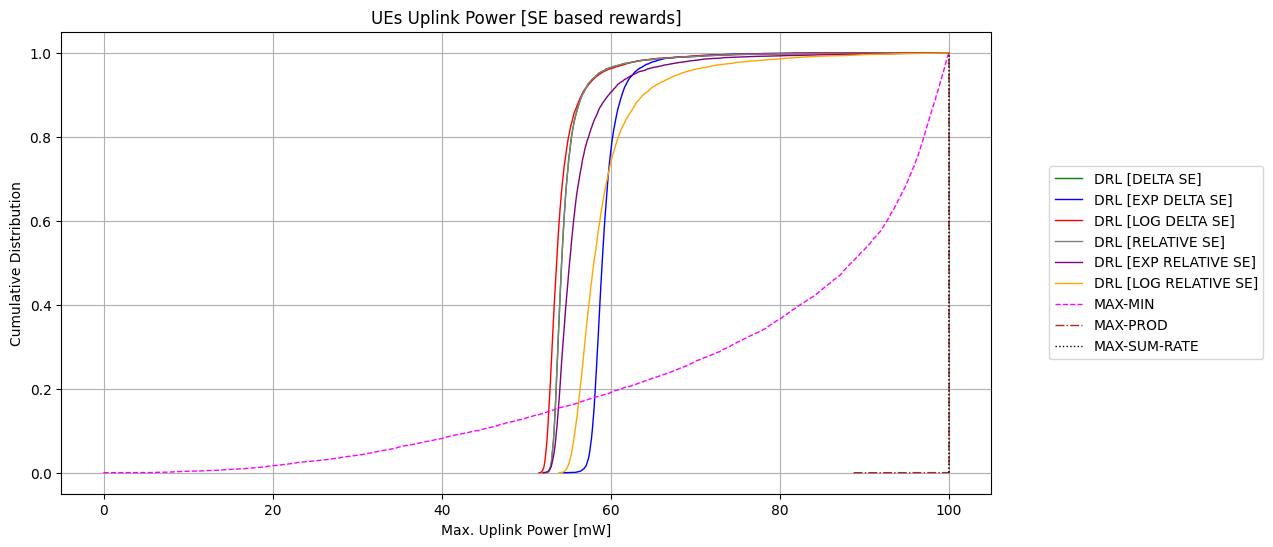

In [167]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=True)

Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


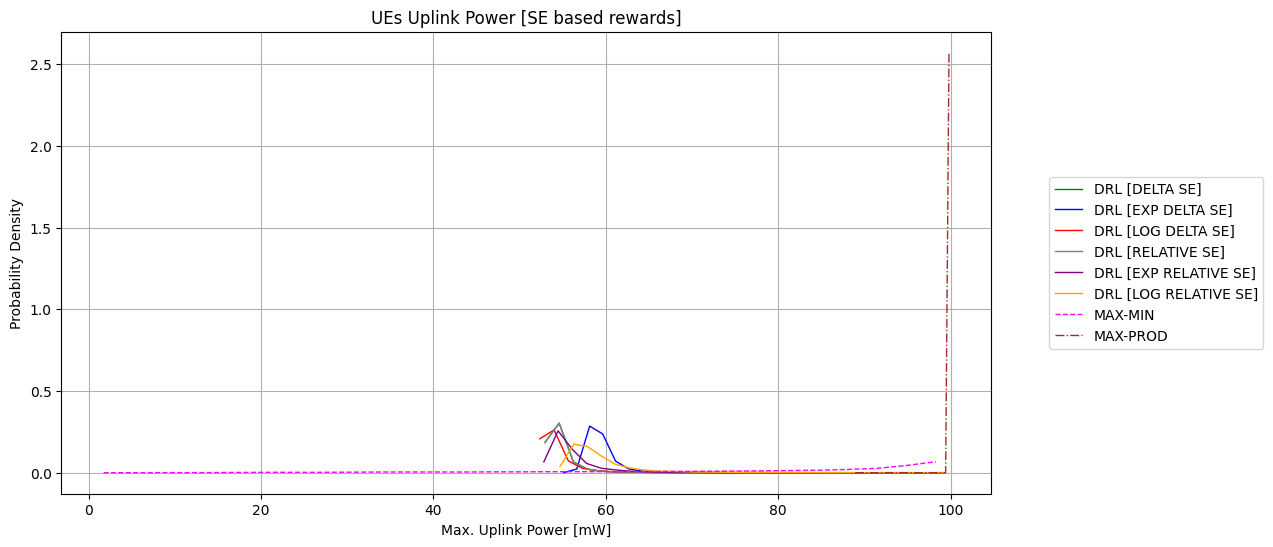

In [168]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=False)

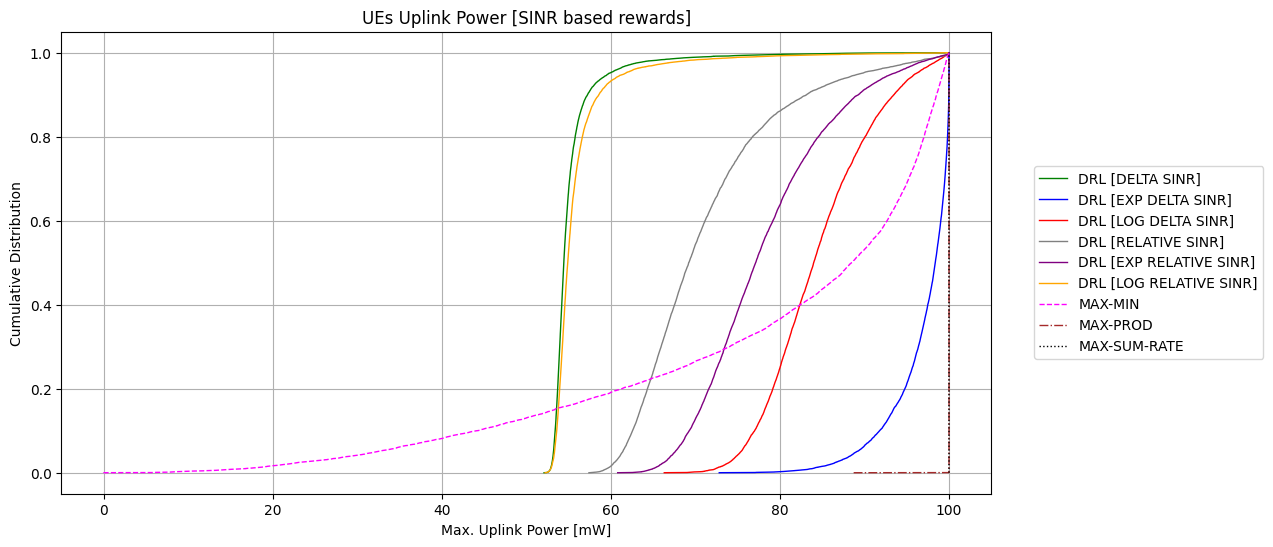

In [169]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=True)

Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


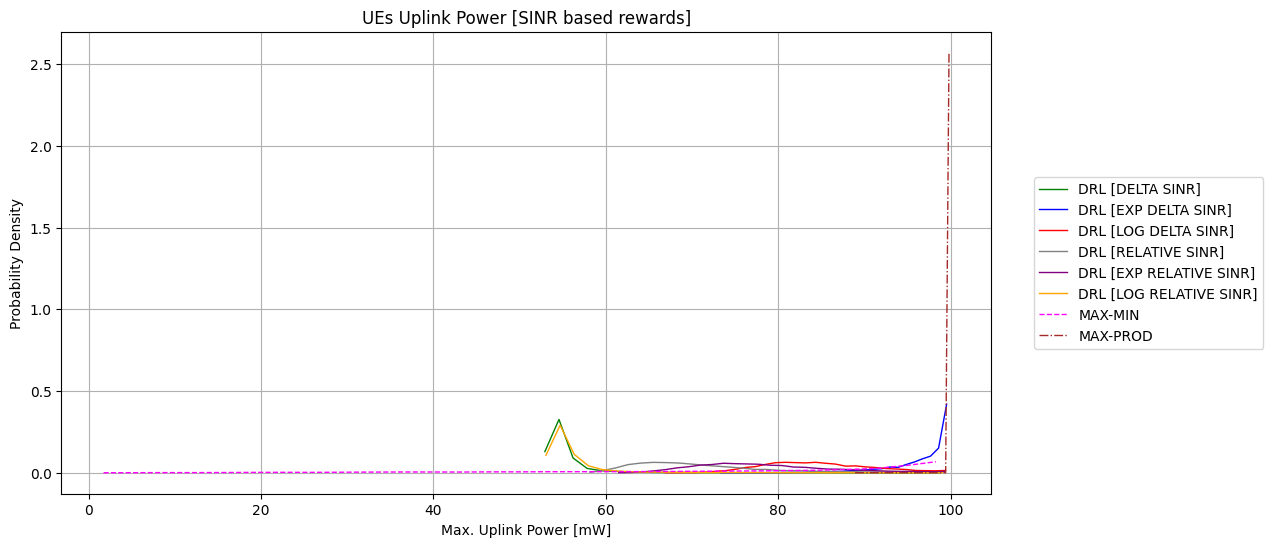

In [170]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=False)

### Sum Uplink Power

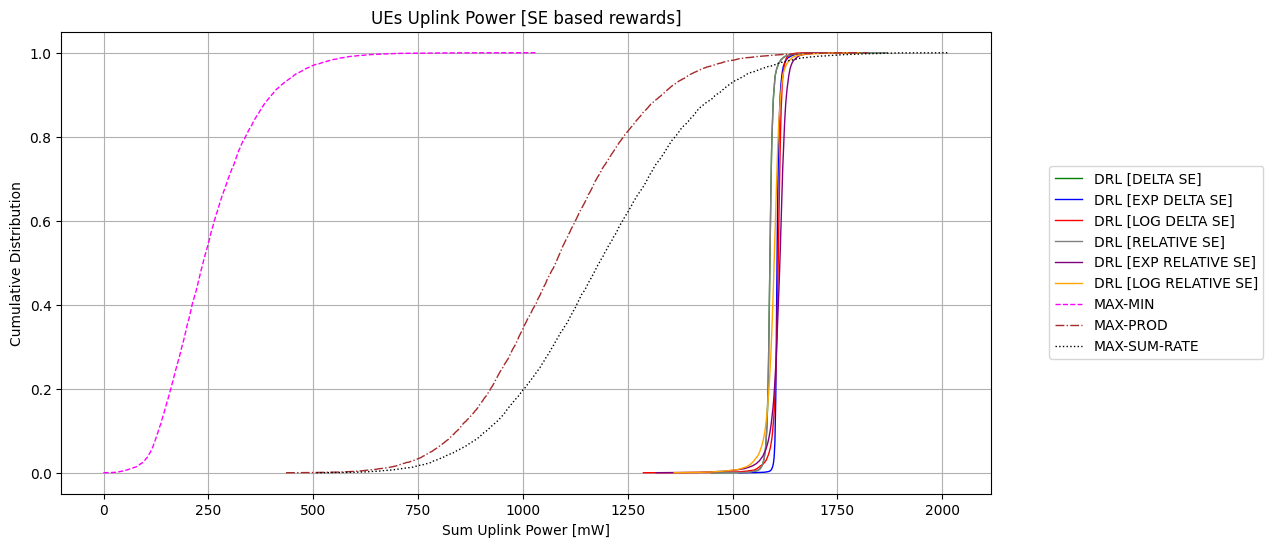

In [171]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=True)

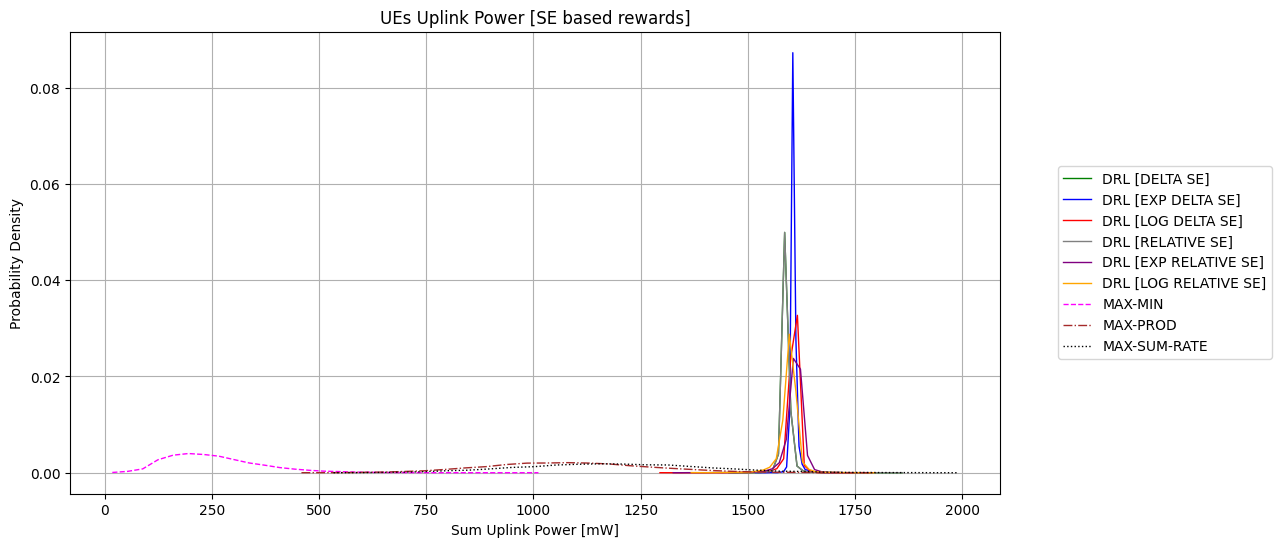

In [172]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=False)

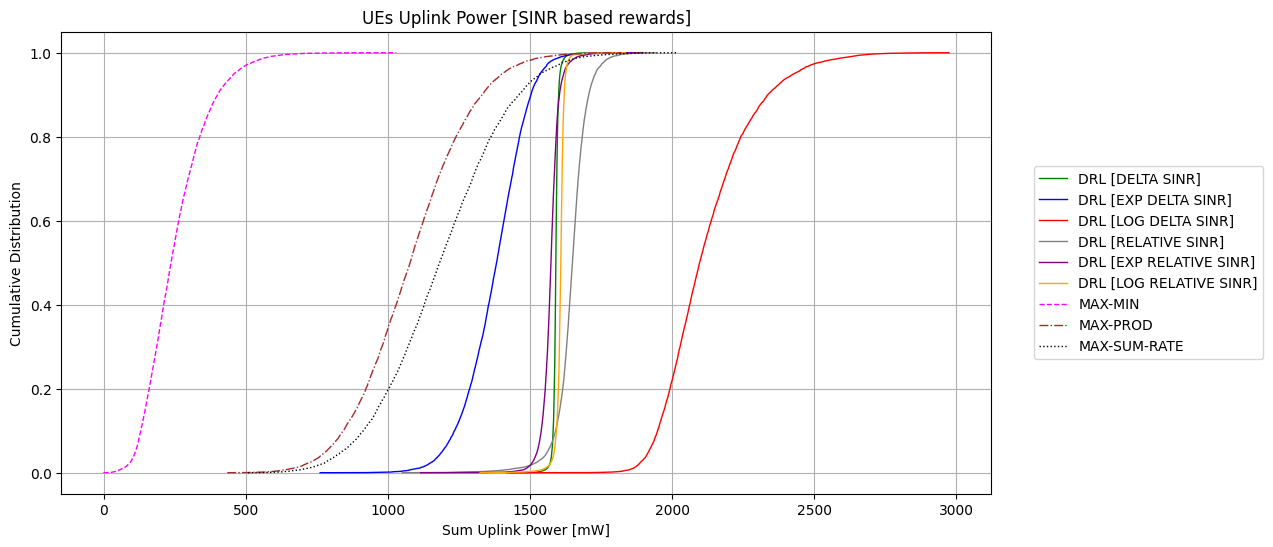

In [173]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=True)

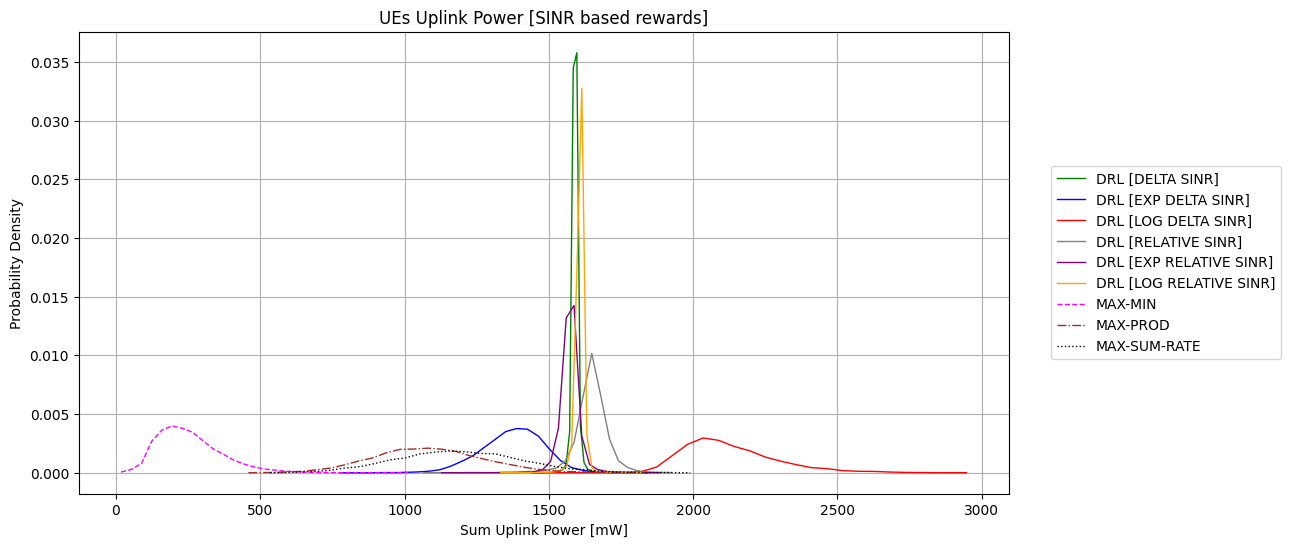

In [174]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=False)

## SINR

In [175]:
# load data from csv files
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)
MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

In [176]:
SINR_DATA_R_SE = {
    'MODEL_DELTA_SE_SINRs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SINRs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SINRs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SINRs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SINRs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SINRs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SINRs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SINRs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SINRs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SINRs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SINRs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SINRs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SINR_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SINRs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SINRs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SINRs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SINRs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SINRs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SINRs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SINRs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SINRs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SINRs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SINRs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SINRs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SINRs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### SINR

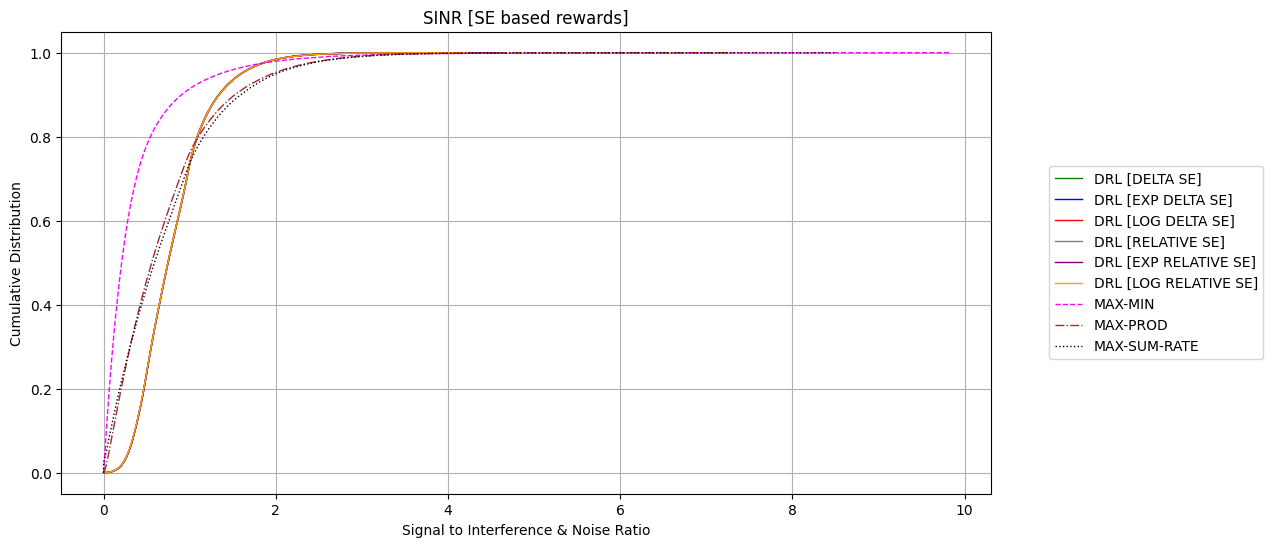

In [177]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=True)

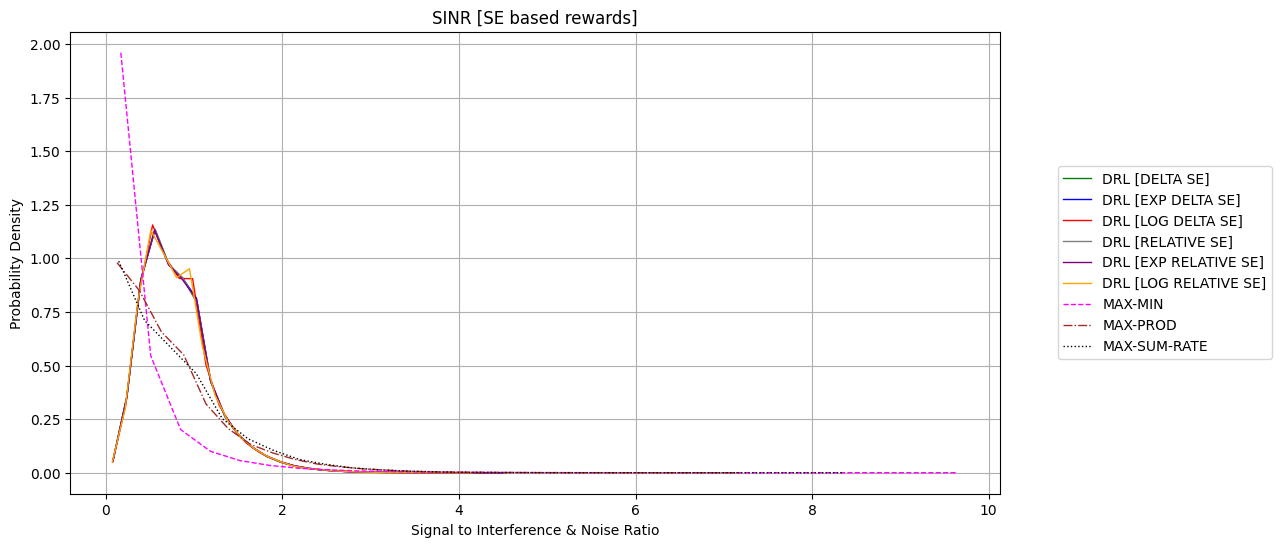

In [178]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=False)

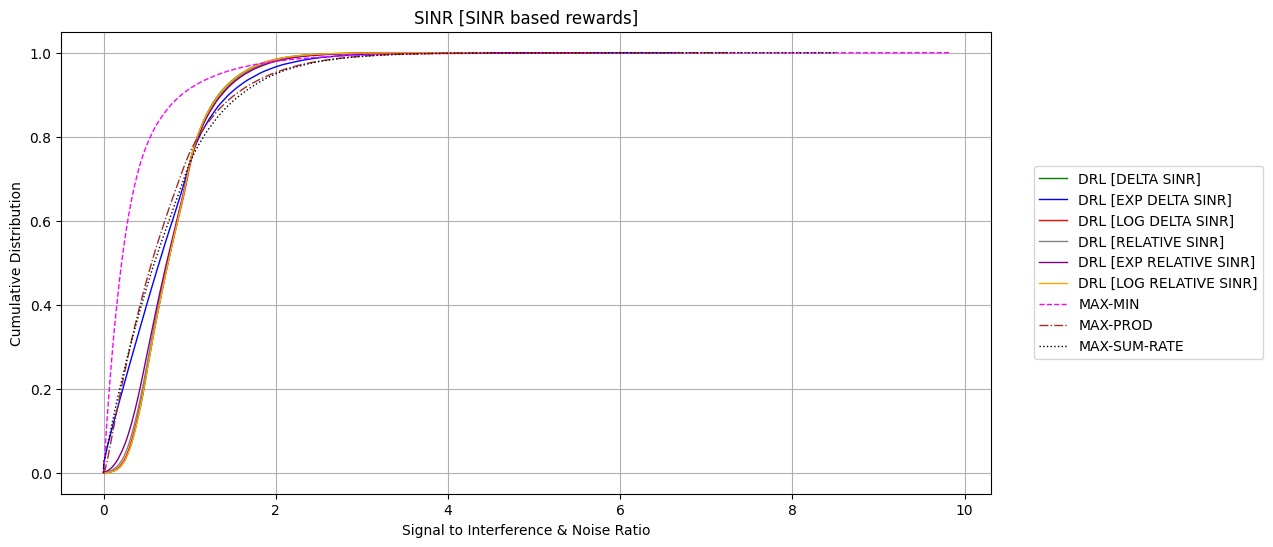

In [179]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=True)

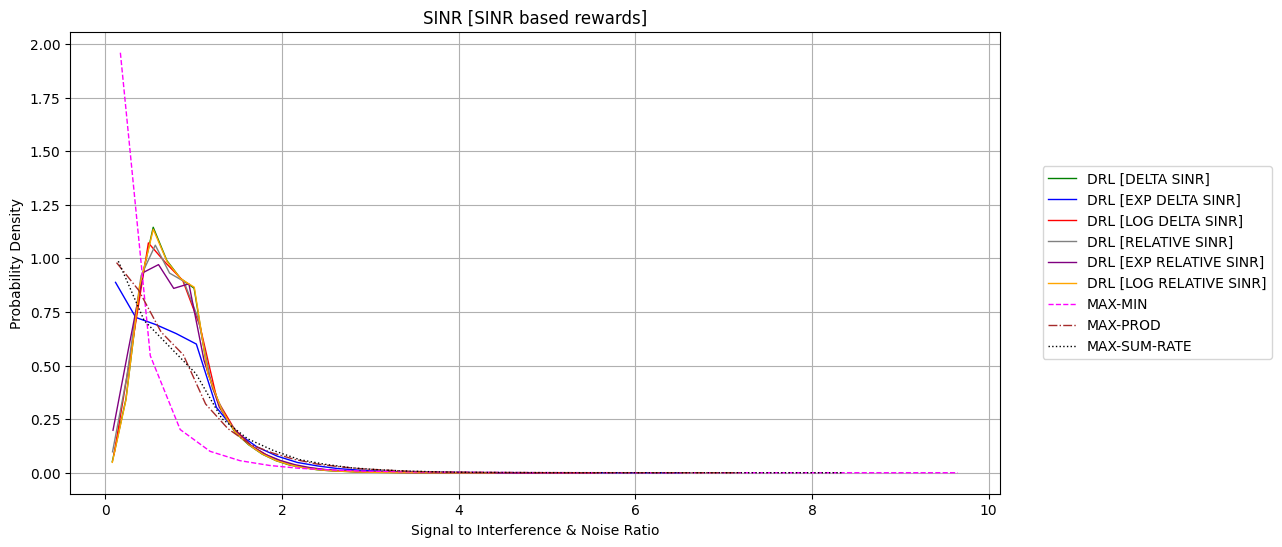

In [180]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=False)

### Mean SINR

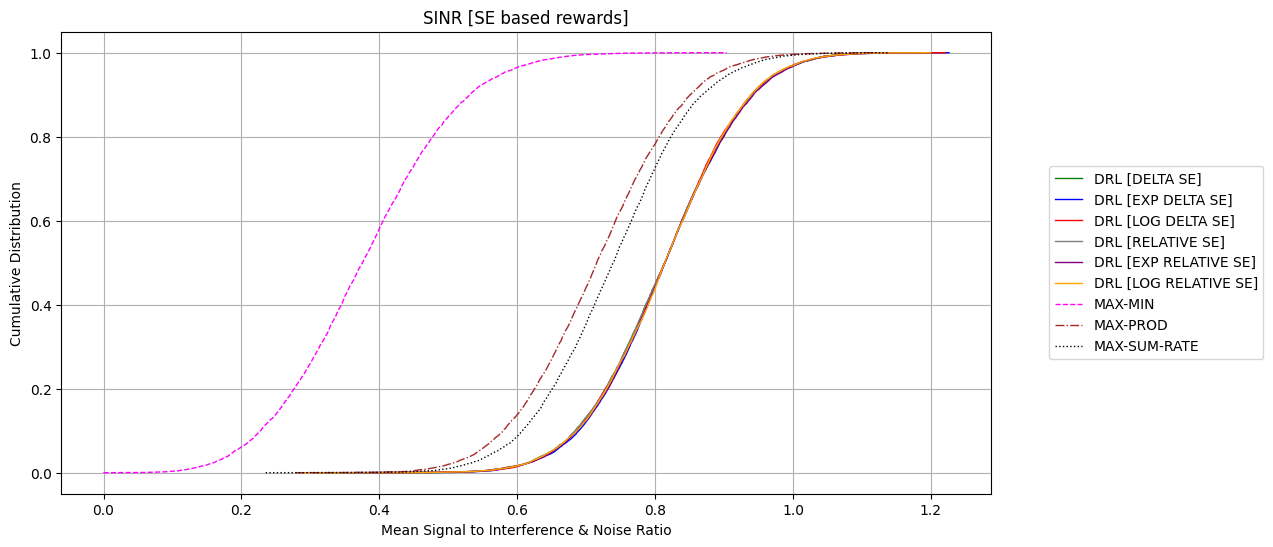

In [181]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=True)

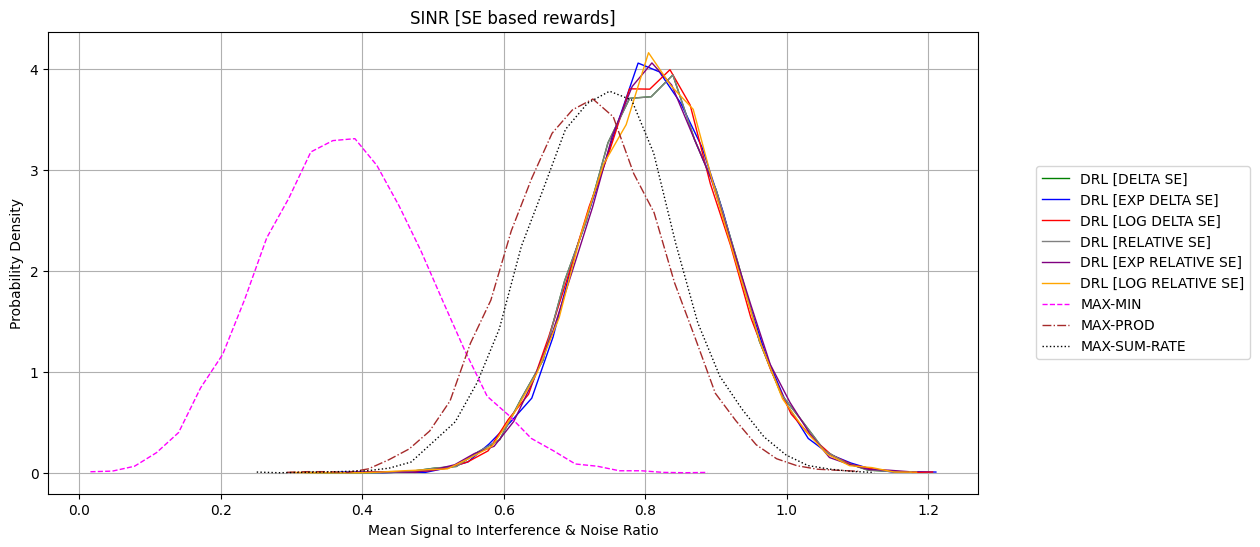

In [182]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=False)

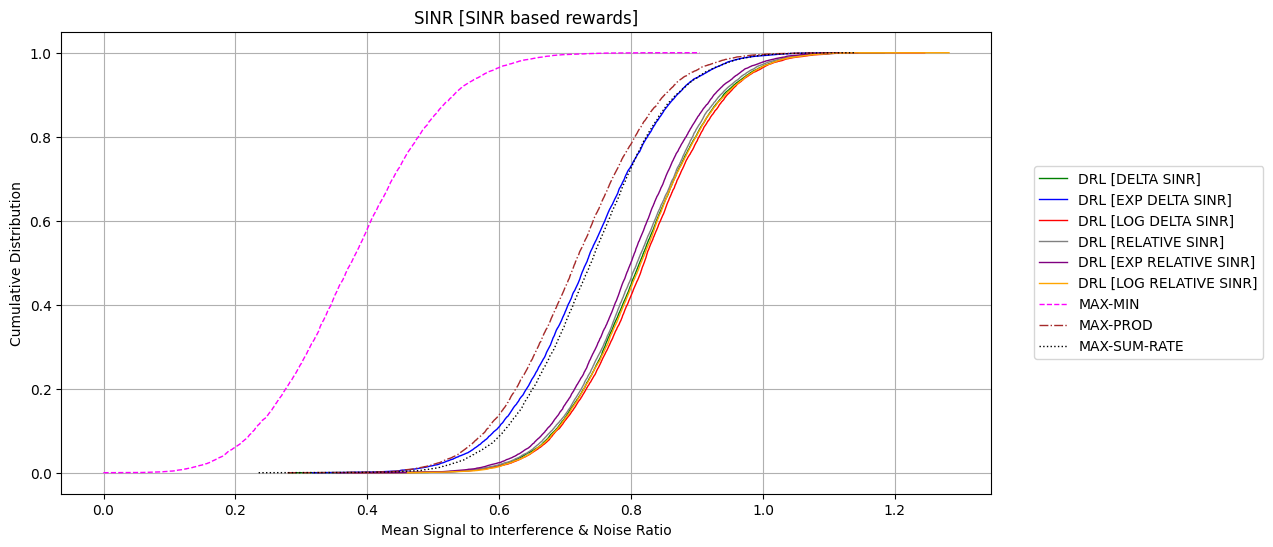

In [183]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=True)

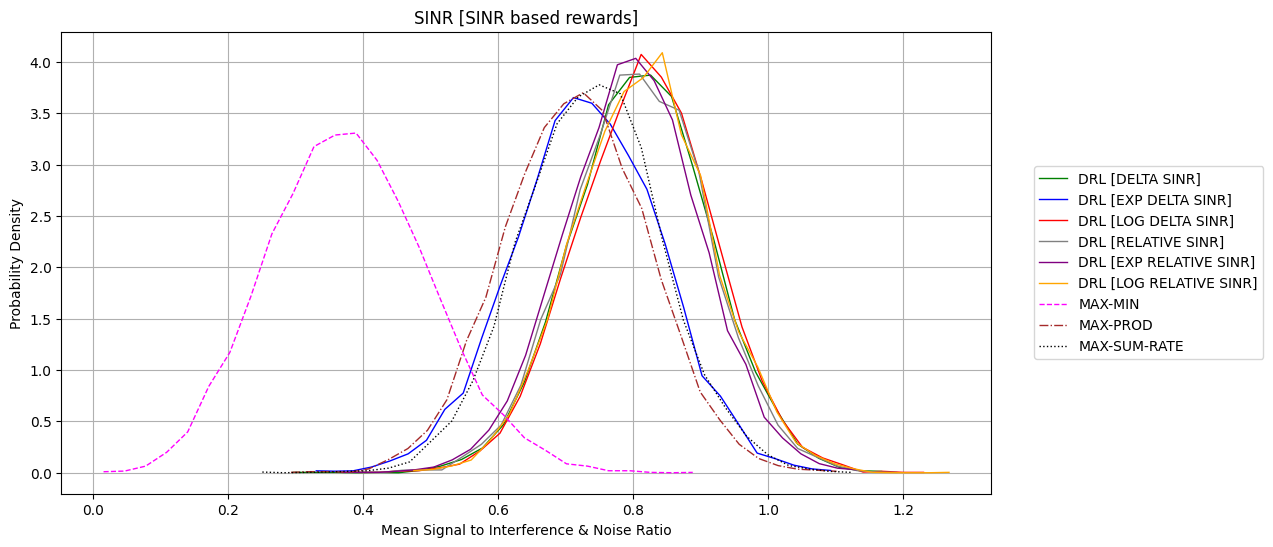

In [184]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=False)

### Min SINR

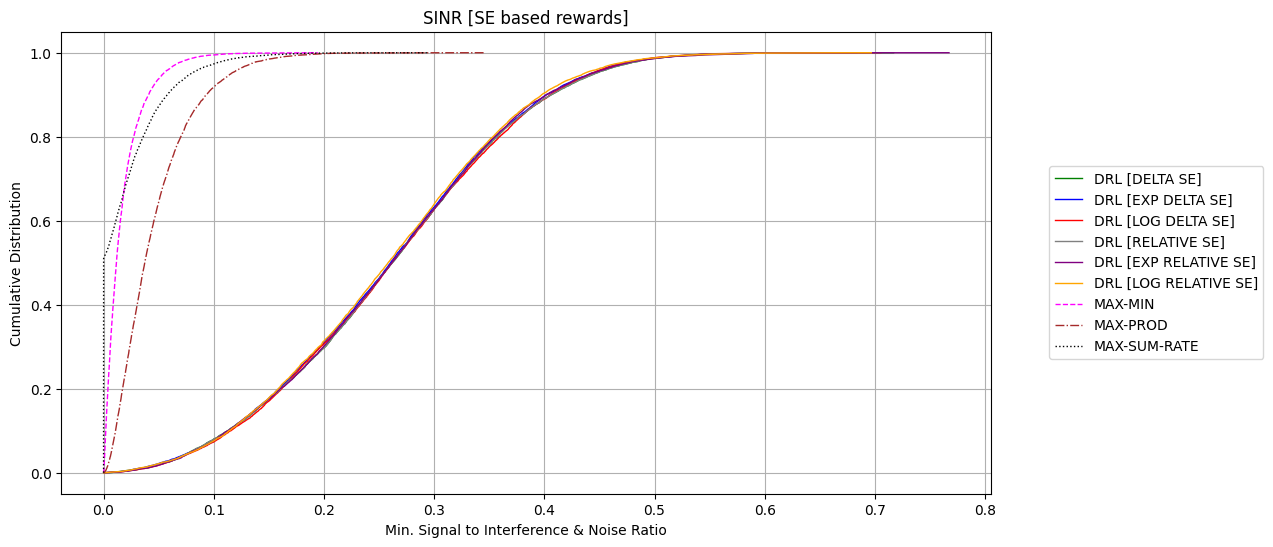

In [185]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=True)

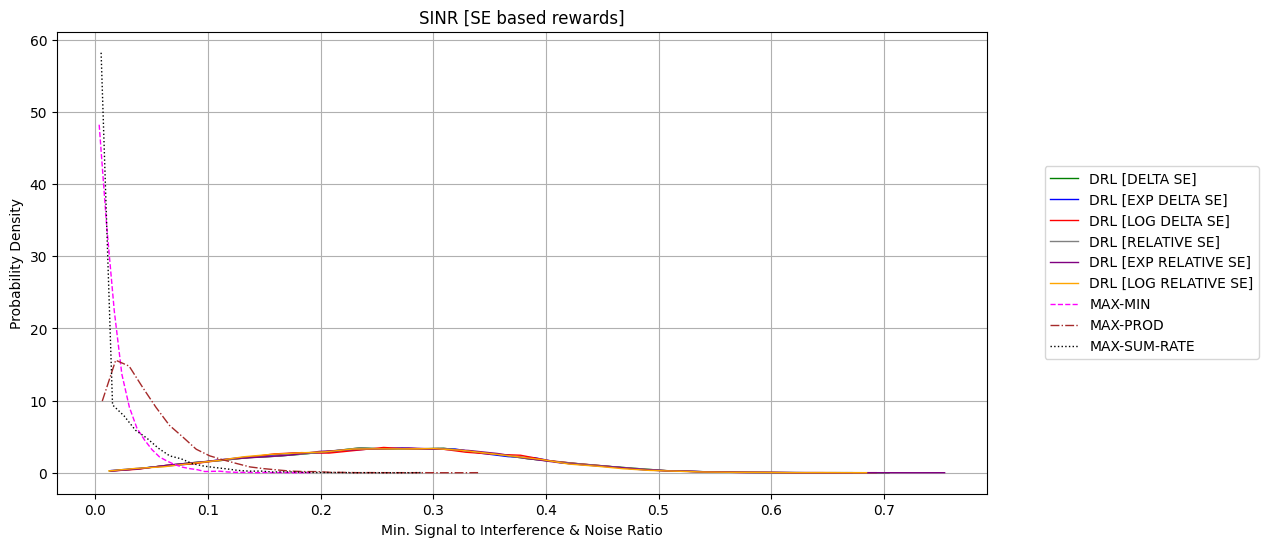

In [186]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=False)

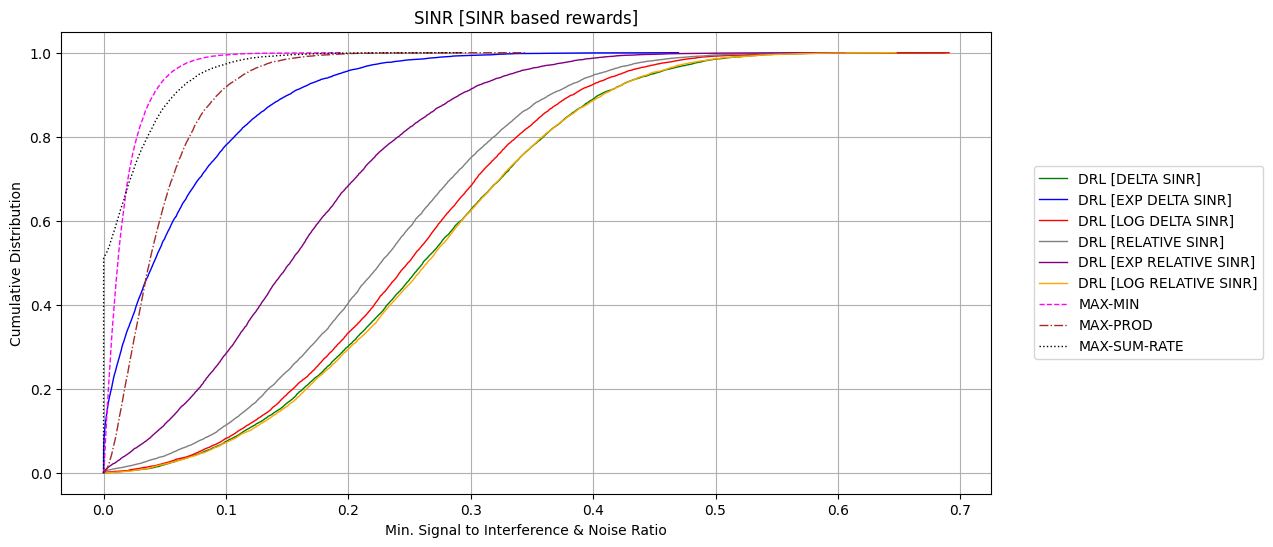

In [187]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=True)

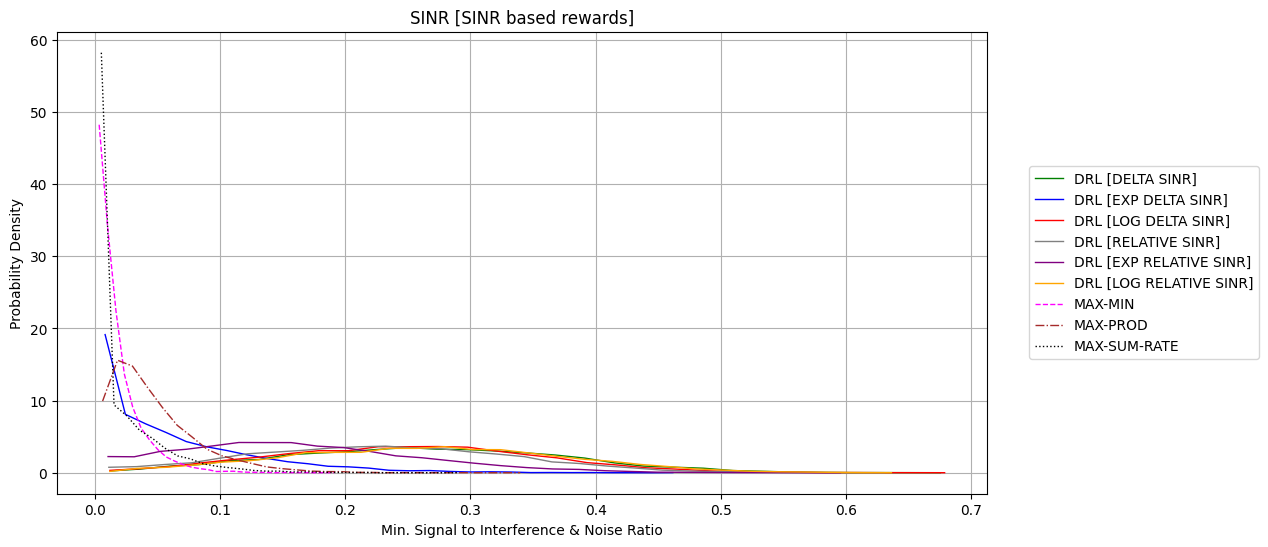

In [188]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=False)

### Max SINR

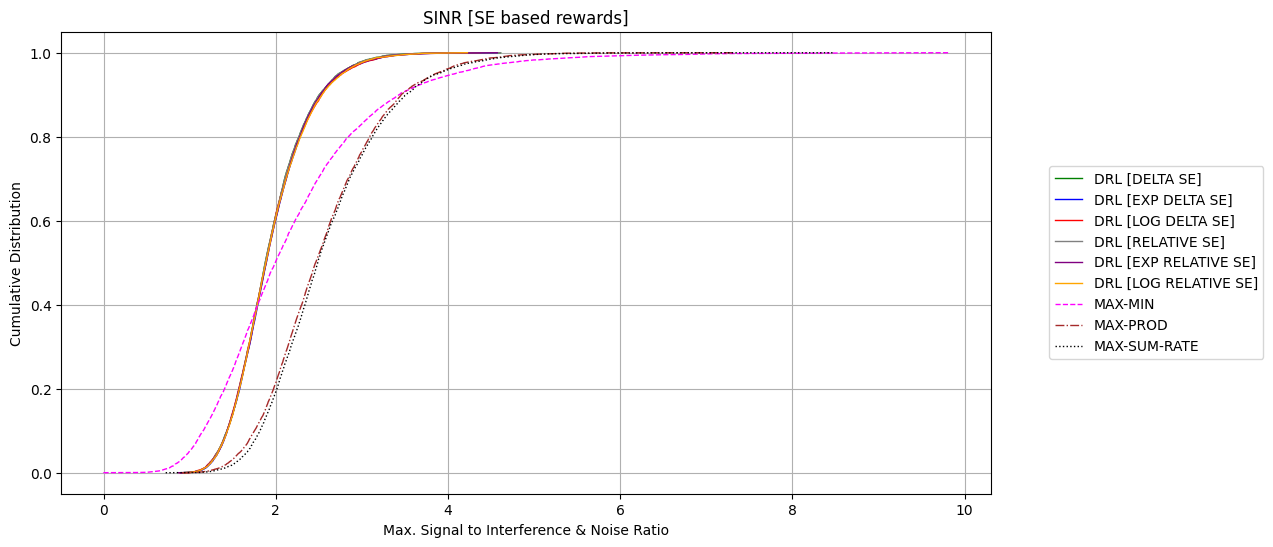

In [189]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=True)

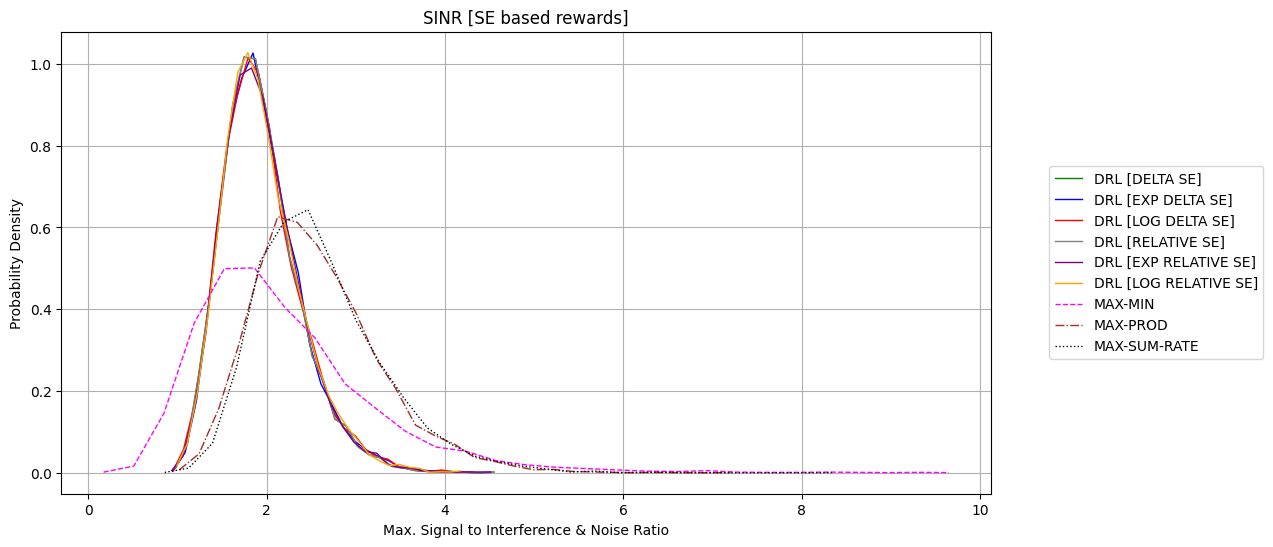

In [190]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=False)

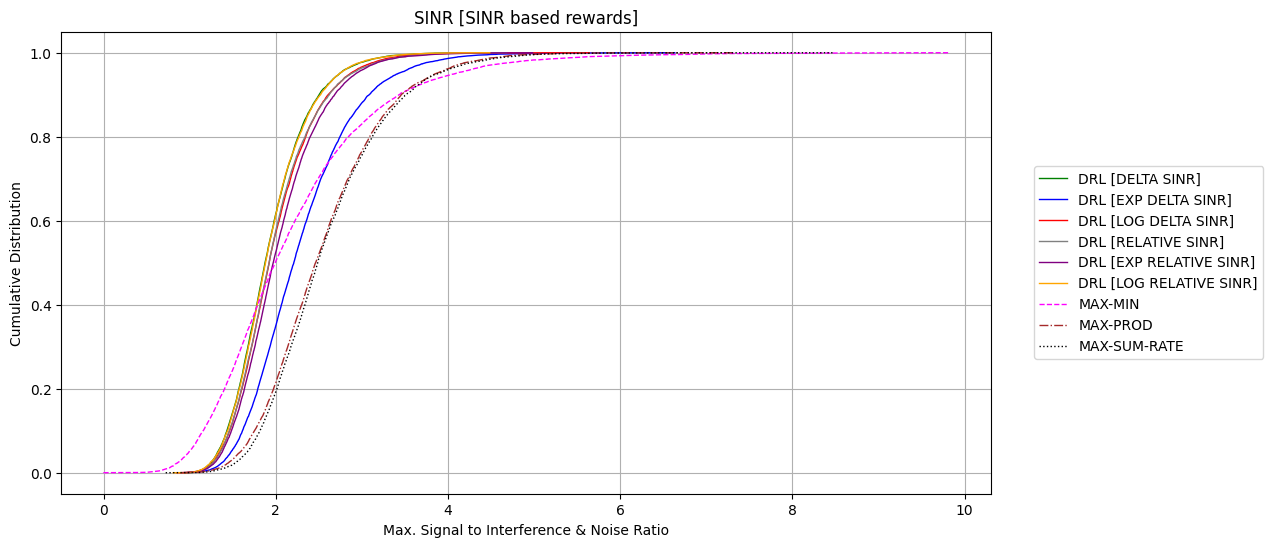

In [191]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=True)

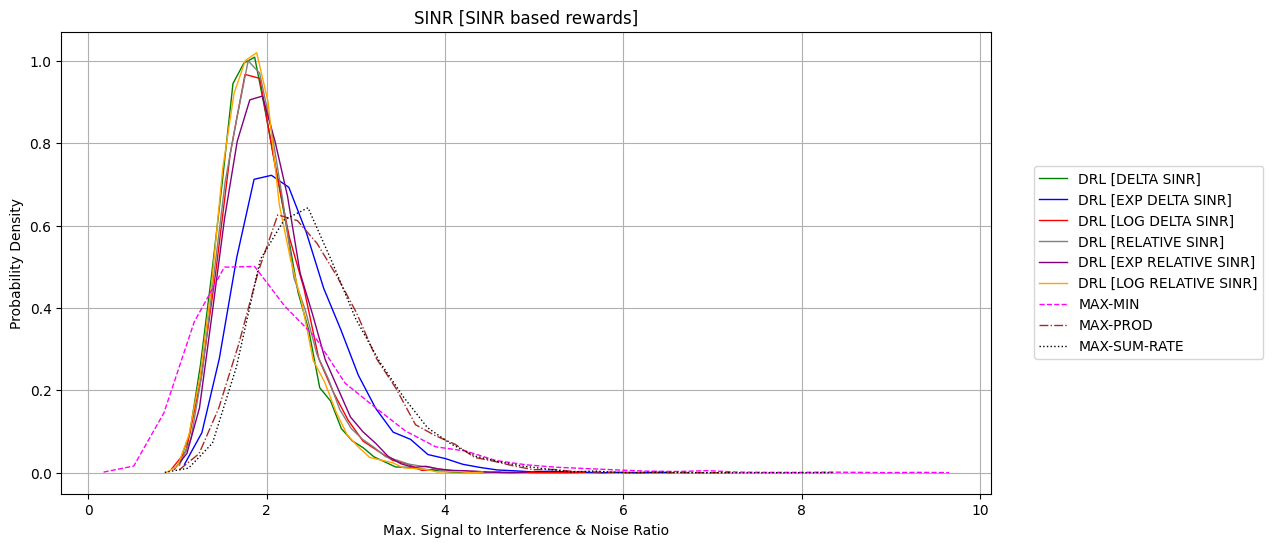

In [192]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=False)

## CDF Comparison

#### SE based reward

In [193]:
compare_models(SINR_DATA_R_SE, operation=None, data_label='SINR')

Label Average SINR  \
MODEL_DELTA_SE_SINRs                     DRL [DELTA SE]     0.812981   
MODEL_EXP_DELTA_CLIP_SE_SINRs        DRL [EXP DELTA SE]     0.814537   
MODEL_LOG_DELTA_SE_SINRs             DRL [LOG DELTA SE]     0.812927   
MODEL_RELATIVE_SE_SINRs               DRL [RELATIVE SE]     0.812981   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs  DRL [EXP RELATIVE SE]     0.814442   
MODEL_LOG_RELATIVE_SE_SINRs       DRL [LOG RELATIVE SE]     0.813338   
MAXMIN_SINRs                                    MAX-MIN     0.378453   
MAXPROD_SINRs                                  MAX-PROD     0.715663   
SUMRATE_SINRs                              MAX-SUM-RATE     0.738255   

                                  Max SINR Standard Deviation 25th Percentile  \
MODEL_DELTA_SE_SINRs              4.611013            0.41335         0.51127   
MODEL_EXP_DELTA_CLIP_SE_SINRs     4.572638           0.415311        0.511417   
MODEL_LOG_DELTA_SE_SINRs          4.381223           0.413898        0.510957   
MODEL_RELATIVE_SE_SINRs           4.611013            0.41335         0.51127   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs  4.573822           0.415454        0.510926   
MODEL_LOG_RELATIVE_SE_SINRs       4.225997           0.416245        0.509885   
MAXMIN_SINRs                      9.819977           0.514287        0.086406   
MAXPROD_SINRs                     7.310175           0.622529        0.255532   
SUMRATE_SINRs                     8.488307           0.646027        0.246132   

                                 50th Percentile 75th Percentile  
MODEL_DELTA_SE_SINRs                    0.747736         1.01625  
MODEL_EXP_DELTA_CLIP_SE_SINRs           0.749154        1.017215  
MODEL_LOG_DELTA_SE_SINRs                0.747072         1.01467  
MODEL_RELATIVE_SE_SINRs                 0.747736         1.01625  
MODEL_EXP_RELATIVE_CLIP_SE_SINRs        0.748943         1.01792  
MODEL_LOG_RELATIVE_SE_SINRs             0.747733        1.016537  
MAXMIN_SINRs                            0.209932         0.44886  
MAXPROD_SINRs                           0.558469        0.975149  
SUMRATE_SINRs                           0.591139        1.028348

In [194]:
# Kolmogorov-Smirnov Test
ks_results_r_se = compare_cdfs_ks(SINR_DATA_R_SE, operation=None)

In [195]:
ks_results_r_se['Best Model']

Criteria             Best Model
0       KS Statistic         DRL [DELTA SE]
1            P-Value         DRL [DELTA SE]
2  Area Between CDFs  DRL [LOG RELATIVE SE]

In [196]:
ks_results_r_se['Details']

Model1                 Model2  KS Statistic        P-Value  \
0          DRL [DELTA SE]     DRL [EXP DELTA SE]      0.002472   2.817941e-01   
1          DRL [DELTA SE]     DRL [LOG DELTA SE]      0.001738   7.188520e-01   
2          DRL [DELTA SE]      DRL [RELATIVE SE]      0.000000   1.000000e+00   
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]      0.002644   2.130046e-01   
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]      0.003116   8.934057e-02   
5          DRL [DELTA SE]                MAX-MIN      0.588078   0.000000e+00   
6          DRL [DELTA SE]               MAX-PROD      0.250281   0.000000e+00   
7          DRL [DELTA SE]           MAX-SUM-RATE      0.244697   0.000000e+00   
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]      0.003131   8.659298e-02   
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]      0.002472   2.817941e-01   
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]      0.001350   9.321145e-01   
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]      0.003209   7.389767e-02   
12     DRL [EXP DELTA SE]                MAX-MIN      0.588100   0.000000e+00   
13     DRL [EXP DELTA SE]               MAX-PROD      0.250344   0.000000e+00   
14     DRL [EXP DELTA SE]           MAX-SUM-RATE      0.244544   0.000000e+00   
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]      0.001738   7.188520e-01   
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]      0.003216   7.295399e-02   
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]      0.003378   5.177336e-02   
18     DRL [LOG DELTA SE]                MAX-MIN      0.588547   0.000000e+00   
19     DRL [LOG DELTA SE]               MAX-PROD      0.251097   0.000000e+00   
20     DRL [LOG DELTA SE]           MAX-SUM-RATE      0.245200   0.000000e+00   
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]      0.002644   2.130046e-01   
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]      0.003116   8.934057e-02   
23      DRL [RELATIVE SE]                MAX-MIN      0.588078   0.000000e+00   
24      DRL [RELATIVE SE]               MAX-PROD      0.250281   0.000000e+00   
25      DRL [RELATIVE SE]           MAX-SUM-RATE      0.244697   0.000000e+00   
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]      0.002537   2.538393e-01   
27  DRL [EXP RELATIVE SE]                MAX-MIN      0.587888   0.000000e+00   
28  DRL [EXP RELATIVE SE]               MAX-PROD      0.250262   0.000000e+00   
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE      0.244569   0.000000e+00   
30  DRL [LOG RELATIVE SE]                MAX-MIN      0.586141   0.000000e+00   
31  DRL [LOG RELATIVE SE]               MAX-PROD      0.248588   0.000000e+00   
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE      0.243056   0.000000e+00   
33                MAX-MIN               MAX-PROD      0.337872   0.000000e+00   
34                MAX-MIN           MAX-SUM-RATE      0.346678   0.000000e+00   
35               MAX-PROD           MAX-SUM-RATE      0.032819  3.722699e-150   

    Area Between CDFs  
0            0.001623  
1            0.001149  
2            0.000000  
3            0.001685  
4            0.001771  
5            0.457513  
6            0.201767  
7            0.205468  
8            0.002176  
9            0.001624  
10           0.000696  
11           0.001608  
12           0.458509  
13           0.201508  
14           0.205103  
15           0.001151  
16           0.002281  
17           0.002069  
18           0.457091  
19           0.201369  
20           0.205242  
21           0.001685  
22           0.001771  
23           0.457513  
24           0.201767  
25           0.205468  
26           0.001518  
27           0.458470  
28           0.201159  
29           0.204663  
30           0.457212  
31           0.200160  
32           0.203849  
33           0.339597  
34           0.362290  
35           0.035147

In [197]:
# Earth Mover's Distance
emd_results_r_se = compare_cdfs_emd(SINR_DATA_R_SE, operation=None)

In [198]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0  DRL [LOG RELATIVE SE]     0.108749
1         DRL [DELTA SE]     0.108875
2      DRL [RELATIVE SE]     0.108875
3  DRL [EXP RELATIVE SE]     0.109023
4     DRL [LOG DELTA SE]     0.109069
5     DRL [EXP DELTA SE]     0.109109
6               MAX-PROD     0.197821
7           MAX-SUM-RATE     0.203407
8                MAX-MIN     0.431037

In [199]:
emd_results_r_se['Details']

Model1                 Model2  EMD Value
0          DRL [DELTA SE]     DRL [EXP DELTA SE]   0.001624
1          DRL [DELTA SE]     DRL [LOG DELTA SE]   0.001151
2          DRL [DELTA SE]      DRL [RELATIVE SE]   0.000000
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]   0.001686
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]   0.001773
5          DRL [DELTA SE]                MAX-MIN   0.457521
6          DRL [DELTA SE]               MAX-PROD   0.201771
7          DRL [DELTA SE]           MAX-SUM-RATE   0.205474
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]   0.002176
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]   0.001624
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]   0.000696
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]   0.001610
12     DRL [EXP DELTA SE]                MAX-MIN   0.458517
13     DRL [EXP DELTA SE]               MAX-PROD   0.201513
14     DRL [EXP DELTA SE]           MAX-SUM-RATE   0.205110
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]   0.001151
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]   0.002281
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]   0.002070
18     DRL [LOG DELTA SE]                MAX-MIN   0.457099
19     DRL [LOG DELTA SE]               MAX-PROD   0.201374
20     DRL [LOG DELTA SE]           MAX-SUM-RATE   0.205249
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]   0.001686
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]   0.001773
23      DRL [RELATIVE SE]                MAX-MIN   0.457521
24      DRL [RELATIVE SE]               MAX-PROD   0.201771
25      DRL [RELATIVE SE]           MAX-SUM-RATE   0.205474
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]   0.001521
27  DRL [EXP RELATIVE SE]                MAX-MIN   0.458478
28  DRL [EXP RELATIVE SE]               MAX-PROD   0.201164
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE   0.204669
30  DRL [LOG RELATIVE SE]                MAX-MIN   0.457221
31  DRL [LOG RELATIVE SE]               MAX-PROD   0.200165
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE   0.203855
33                MAX-MIN               MAX-PROD   0.339663
34                MAX-MIN           MAX-SUM-RATE   0.362272
35               MAX-PROD           MAX-SUM-RATE   0.035151

In [200]:
moments_r_se = compare_cdfs_moments(SINR_DATA_R_SE, operation=None, criteria='kurtosis')

In [201]:
moments_r_se['Ranked Models']

Model  Rank
0              MODEL_DELTA_SE_SINRs     1
3           MODEL_RELATIVE_SE_SINRs     2
4  MODEL_EXP_RELATIVE_CLIP_SE_SINRs     3
5       MODEL_LOG_RELATIVE_SE_SINRs     4
1     MODEL_EXP_DELTA_CLIP_SE_SINRs     5
2          MODEL_LOG_DELTA_SE_SINRs     6
8                     SUMRATE_SINRs     7
7                     MAXPROD_SINRs     8
6                      MAXMIN_SINRs     9

In [202]:
moments_r_se['Details']

Model      Mean  Variance  Skewness   Kurtosis
0              MODEL_DELTA_SE_SINRs  0.812981  0.170858  1.231508   2.643690
1     MODEL_EXP_DELTA_CLIP_SE_SINRs  0.814537  0.172484  1.244813   2.723519
2          MODEL_LOG_DELTA_SE_SINRs  0.812927  0.171312  1.258260   2.798048
3           MODEL_RELATIVE_SE_SINRs  0.812981  0.170858  1.231508   2.643690
4  MODEL_EXP_RELATIVE_CLIP_SE_SINRs  0.814442  0.172602  1.240624   2.703668
5       MODEL_LOG_RELATIVE_SE_SINRs  0.813338  0.173260  1.245639   2.715131
6                      MAXMIN_SINRs  0.378453  0.264491  3.671797  22.066646
7                     MAXPROD_SINRs  0.715663  0.387542  1.696570   4.109335
8                     SUMRATE_SINRs  0.738255  0.417351  1.538925   3.490707

In [203]:
calculate_and_rank_percentiles(SINR_DATA_R_SE, [50, 75])

Model  50th Percentile  75th Percentile  Rank
8           MAX-SUM-RATE         0.591139         1.028348     1
4  DRL [EXP RELATIVE SE]         0.748943         1.017920     2
1     DRL [EXP DELTA SE]         0.749154         1.017215     3
5  DRL [LOG RELATIVE SE]         0.747733         1.016537     4
0         DRL [DELTA SE]         0.747736         1.016250     5
3      DRL [RELATIVE SE]         0.747736         1.016250     5
2     DRL [LOG DELTA SE]         0.747072         1.014670     7
7               MAX-PROD         0.558469         0.975149     8
6                MAX-MIN         0.209932         0.448860     9

#### SINR based reward

In [204]:
compare_models(SINR_DATA_R_SINR, operation=None, data_label='SINR')

Label Average SINR  \
MODEL_DELTA_SINR_SINRs                     DRL [DELTA SINR]     0.812762   
MODEL_EXP_DELTA_CLIP_SINR_SINRs        DRL [EXP DELTA SINR]     0.732236   
MODEL_LOG_DELTA_SINR_SINRs             DRL [LOG DELTA SINR]     0.818145   
MODEL_RELATIVE_SINR_SINRs               DRL [RELATIVE SINR]     0.808986   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  DRL [EXP RELATIVE SINR]      0.79896   
MODEL_LOG_RELATIVE_SINR_SINRs       DRL [LOG RELATIVE SINR]     0.814383   
MAXMIN_SINRs                                        MAX-MIN     0.378453   
MAXPROD_SINRs                                      MAX-PROD     0.715663   
SUMRATE_SINRs                                  MAX-SUM-RATE     0.738255   

                                    Max SINR Standard Deviation  \
MODEL_DELTA_SINR_SINRs              4.478317           0.412963   
MODEL_EXP_DELTA_CLIP_SINR_SINRs     6.634297           0.569836   
MODEL_LOG_DELTA_SINR_SINRs          5.643797            0.42773   
MODEL_RELATIVE_SINR_SINRs           4.680335           0.432369   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  4.983332           0.453604   
MODEL_LOG_RELATIVE_SINR_SINRs       4.485703           0.413714   
MAXMIN_SINRs                        9.819977           0.514287   
MAXPROD_SINRs                       7.310175           0.622529   
SUMRATE_SINRs                       8.488307           0.646027   

                                   25th Percentile 50th Percentile  \
MODEL_DELTA_SINR_SINRs                    0.511784        0.747328   
MODEL_EXP_DELTA_CLIP_SINR_SINRs           0.292177        0.646257   
MODEL_LOG_DELTA_SINR_SINRs                0.506808        0.749987   
MODEL_RELATIVE_SINR_SINRs                 0.497029        0.742638   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs        0.472923        0.732953   
MODEL_LOG_RELATIVE_SINR_SINRs             0.511856        0.749539   
MAXMIN_SINRs                              0.086406        0.209932   
MAXPROD_SINRs                             0.255532        0.558469   
SUMRATE_SINRs                             0.246132        0.591139   

                                   75th Percentile  
MODEL_DELTA_SINR_SINRs                    1.016198  
MODEL_EXP_DELTA_CLIP_SINR_SINRs           1.016796  
MODEL_LOG_DELTA_SINR_SINRs                1.024107  
MODEL_RELATIVE_SINR_SINRs                 1.018632  
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs         1.01954  
MODEL_LOG_RELATIVE_SINR_SINRs             1.016916  
MAXMIN_SINRs                               0.44886  
MAXPROD_SINRs                             0.975149  
SUMRATE_SINRs                             1.028348

In [205]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SINR_DATA_R_SINR, operation=None)

In [206]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.203872   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.008316   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.021297   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.049678   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002450   
5          DRL [DELTA SINR]                  MAX-MIN      0.588041   
6          DRL [DELTA SINR]                 MAX-PROD      0.250344   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.244397   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.198772   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.184481   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.156197   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.204538   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.388862   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.060228   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.042703   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.014644   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.043334   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.008106   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.581616   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.244153   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.239197   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.029031   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.021312   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.567247   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.229675   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.224800   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.049550   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.538647   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.201241   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.196384   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.587803   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.250331   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.245000   
33                  MAX-MIN                 MAX-PROD      0.337872   
34                  MAX-MIN             MAX-SUM-RATE      0.346678   
35                 MAX-PROD             MAX-SUM-RATE      0.032819   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.145921  
1    4.880593e-10           0.009714  
2    1.802500e-63           0.014100  
3    0.000000e+00           0.032529  
4    2.915864e-01           0.001728  
5    0.000000e+00           0.457350  
6    0.000000e+00           0.201991  
7    0.000000e+00           0.205735  
8    0.000000e+00           0.139045  
9    0.000000e+00           0.131991  
10   0.000000e+00           0.113553  
11   0.000000e+00           0.146032  
12   0.000000e+00           0.360619  
13   0.000000e+00           0.063644  
14  5.738416e-254           0.059872  
15   3.117867e-30           0.009369  
16  1.601579e-261           0.025728  
17   1.466852e-09           0.008804  
18   0.000000e+00           0.459339  
19   0.000000e+00           0.195777  
20   0.000000e+00           0.198594  
21  1.385097e-117           0.018492  
22   1.456556e-63           0.014145  
23   0.000000e+00           0.450182  
24   0.000000e+00           0.188451  
25   0.000000e+00           0.191790  
26   0.000000e+00           0.032632  
27   0.000000e+00           0.437758  
28   0.000000e+00           0.170150  
29   0.000000e+00           0.173305  
30   0.000000e+00           0.458860  
31   0.000000e+00           0.202272  
32   0.000000e+00           0.205903  
33   0.000000e+00           0.339597  
34   0.000000e+00           0.362290  
35  3.722699e-150         

In [207]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.203872   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.008316   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.021297   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.049678   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002450   
5          DRL [DELTA SINR]                  MAX-MIN      0.588041   
6          DRL [DELTA SINR]                 MAX-PROD      0.250344   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.244397   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.198772   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.184481   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.156197   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.204538   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.388862   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.060228   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.042703   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.014644   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.043334   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.008106   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.581616   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.244153   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.239197   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.029031   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.021312   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.567247   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.229675   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.224800   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.049550   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.538647   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.201241   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.196384   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.587803   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.250331   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.245000   
33                  MAX-MIN                 MAX-PROD      0.337872   
34                  MAX-MIN             MAX-SUM-RATE      0.346678   
35                 MAX-PROD             MAX-SUM-RATE      0.032819   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.145921  
1    4.880593e-10           0.009714  
2    1.802500e-63           0.014100  
3    0.000000e+00           0.032529  
4    2.915864e-01           0.001728  
5    0.000000e+00           0.457350  
6    0.000000e+00           0.201991  
7    0.000000e+00           0.205735  
8    0.000000e+00           0.139045  
9    0.000000e+00           0.131991  
10   0.000000e+00           0.113553  
11   0.000000e+00           0.146032  
12   0.000000e+00           0.360619  
13   0.000000e+00           0.063644  
14  5.738416e-254           0.059872  
15   3.117867e-30           0.009369  
16  1.601579e-261           0.025728  
17   1.466852e-09           0.008804  
18   0.000000e+00           0.459339  
19   0.000000e+00           0.195777  
20   0.000000e+00           0.198594  
21  1.385097e-117           0.018492  
22   1.456556e-63           0.014145  
23   0.000000e+00           0.450182  
24   0.000000e+00           0.188451  
25   0.000000e+00           0.191790  
26   0.000000e+00           0.032632  
27   0.000000e+00           0.437758  
28   0.000000e+00           0.170150  
29   0.000000e+00           0.173305  
30   0.000000e+00           0.458860  
31   0.000000e+00           0.202272  
32   0.000000e+00           0.205903  
33   0.000000e+00           0.339597  
34   0.000000e+00           0.362290  
35  3.722699e-150         

In [208]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SINR_DATA_R_SINR, operation=None)

In [209]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.125525
1      DRL [RELATIVE SINR]     0.127324
2     DRL [LOG DELTA SINR]     0.130800
3         DRL [DELTA SINR]     0.133637
4  DRL [LOG RELATIVE SINR]     0.133810
5     DRL [EXP DELTA SINR]     0.145106
6                 MAX-PROD     0.174640
7             MAX-SUM-RATE     0.179082
8                  MAX-MIN     0.415761

In [210]:
emd_results_r_sinr['Details']

Model1                   Model2  EMD Value
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]   0.145924
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]   0.009716
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]   0.014101
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]   0.032530
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]   0.001728
5          DRL [DELTA SINR]                  MAX-MIN   0.457359
6          DRL [DELTA SINR]                 MAX-PROD   0.201995
7          DRL [DELTA SINR]             MAX-SUM-RATE   0.205741
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]   0.139047
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]   0.132038
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]   0.113580
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]   0.146108
12     DRL [EXP DELTA SINR]                  MAX-MIN   0.360624
13     DRL [EXP DELTA SINR]                 MAX-PROD   0.063647
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE   0.059875
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]   0.009372
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]   0.025730
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]   0.008809
18     DRL [LOG DELTA SINR]                  MAX-MIN   0.459345
19     DRL [LOG DELTA SINR]                 MAX-PROD   0.195780
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE   0.198598
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]   0.018492
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.014146
23      DRL [RELATIVE SINR]                  MAX-MIN   0.450190
24      DRL [RELATIVE SINR]                 MAX-PROD   0.188455
25      DRL [RELATIVE SINR]             MAX-SUM-RATE   0.191796
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.032636
27  DRL [EXP RELATIVE SINR]                  MAX-MIN   0.437765
28  DRL [EXP RELATIVE SINR]                 MAX-PROD   0.170154
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE   0.173310
30  DRL [LOG RELATIVE SINR]                  MAX-MIN   0.458868
31  DRL [LOG RELATIVE SINR]                 MAX-PROD   0.202276
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE   0.205910
33                  MAX-MIN                 MAX-PROD   0.339663
34                  MAX-MIN             MAX-SUM-RATE   0.362272
35                 MAX-PROD             MAX-SUM-RATE   0.035151

In [211]:
moments_r_sinr = compare_cdfs_moments(SINR_DATA_R_SINR, operation=None, criteria='kurtosis')

In [212]:
moments_r_sinr['Ranked Models']

Model  Rank
5       MODEL_LOG_RELATIVE_SINR_SINRs     1
0              MODEL_DELTA_SINR_SINRs     2
4  MODEL_EXP_RELATIVE_CLIP_SINR_SINRs     3
1     MODEL_EXP_DELTA_CLIP_SINR_SINRs     4
3           MODEL_RELATIVE_SINR_SINRs     5
2          MODEL_LOG_DELTA_SINR_SINRs     6
8                       SUMRATE_SINRs     7
7                       MAXPROD_SINRs     8
6                        MAXMIN_SINRs     9

In [213]:
moments_r_sinr['Details']

Model      Mean  Variance  Skewness   Kurtosis
0              MODEL_DELTA_SINR_SINRs  0.812762  0.170538  1.238009   2.712982
1     MODEL_EXP_DELTA_CLIP_SINR_SINRs  0.732236  0.324713  1.291176   2.846178
2          MODEL_LOG_DELTA_SINR_SINRs  0.818145  0.182953  1.296801   3.037549
3           MODEL_RELATIVE_SINR_SINRs  0.808986  0.186943  1.270249   3.013494
4  MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  0.798960  0.205756  1.231427   2.807646
5       MODEL_LOG_RELATIVE_SINR_SINRs  0.814383  0.171159  1.234479   2.673562
6                        MAXMIN_SINRs  0.378453  0.264491  3.671797  22.066646
7                       MAXPROD_SINRs  0.715663  0.387542  1.696570   4.109335
8                       SUMRATE_SINRs  0.738255  0.417351  1.538925   3.490707

In [214]:
calculate_and_rank_percentiles(SINR_DATA_R_SINR, [50, 75])

Model  50th Percentile  75th Percentile  Rank
8             MAX-SUM-RATE         0.591139         1.028348     1
2     DRL [LOG DELTA SINR]         0.749987         1.024107     2
4  DRL [EXP RELATIVE SINR]         0.732953         1.019540     3
3      DRL [RELATIVE SINR]         0.742638         1.018632     4
5  DRL [LOG RELATIVE SINR]         0.749539         1.016916     5
1     DRL [EXP DELTA SINR]         0.646257         1.016796     6
0         DRL [DELTA SINR]         0.747328         1.016198     7
7                 MAX-PROD         0.558469         0.975149     8
6                  MAX-MIN         0.209932         0.448860     9

## SINR Heatmaps

In [218]:
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)

MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)

MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)

MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

UEs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/UEs_LOCATIONS.csv', index_col=0)
APs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/APs_LOCATIONS.csv', index_col=0)

In [219]:
grid_size = (100, 100)

In [220]:
vmin = -10
vmax = 5
colorbar_ticks = generate_colorbar_ticks(vmin, vmax, 5)

In [221]:
# plot_sinr_heatmap(title='DRL [DELTA SE]', sinr_df=MODEL_DELTA_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [222]:
# plot_sinr_heatmap(title='DRL [EXP DELTA CLIP SE]', sinr_df=MODEL_EXP_DELTA_CLIP_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [223]:
# plot_sinr_heatmap(title='DRL [LOG DELTA SE]', sinr_df=MODEL_LOG_DELTA_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [224]:
# plot_sinr_heatmap(title='DRL [RELATIVE SE]', sinr_df=MODEL_RELATIVE_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [225]:
# plot_sinr_heatmap(title='DRL [EXP RELATIVE CLIP SE]', sinr_df=MODEL_EXP_RELATIVE_CLIP_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [226]:
# plot_sinr_heatmap(title='DRL [LOG RELATIVE SE]', sinr_df=MODEL_LOG_RELATIVE_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [227]:
# plot_sinr_heatmap(title='DRL [DELTA_SINR]', sinr_df=MODEL_DELTA_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [228]:
# plot_sinr_heatmap(title='DRL [EXP DELTA CLIP SINR]', sinr_df=MODEL_EXP_DELTA_CLIP_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [229]:
# plot_sinr_heatmap(title='DRL [LOG DELTA SINR]', sinr_df=MODEL_LOG_DELTA_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [230]:
# plot_sinr_heatmap(title='DRL [RELATIVE SINR]', sinr_df=MODEL_RELATIVE_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [231]:
# plot_sinr_heatmap(title='DRL [EXP RELATIVE CLIP SINR]', sinr_df=MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [232]:
# plot_sinr_heatmap(title='DRL [LOG RELATIVE SINR]', sinr_df=MODEL_LOG_RELATIVE_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [233]:
# plot_sinr_heatmap(title='DRL [MAXMIN]', sinr_df=MAXMIN_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [234]:
# plot_sinr_heatmap(title='DRL [MAXPROD]', sinr_df=MAXPROD_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [235]:
# plot_sinr_heatmap(title='DRL [SUMRATE]', sinr_df=SUMRATE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

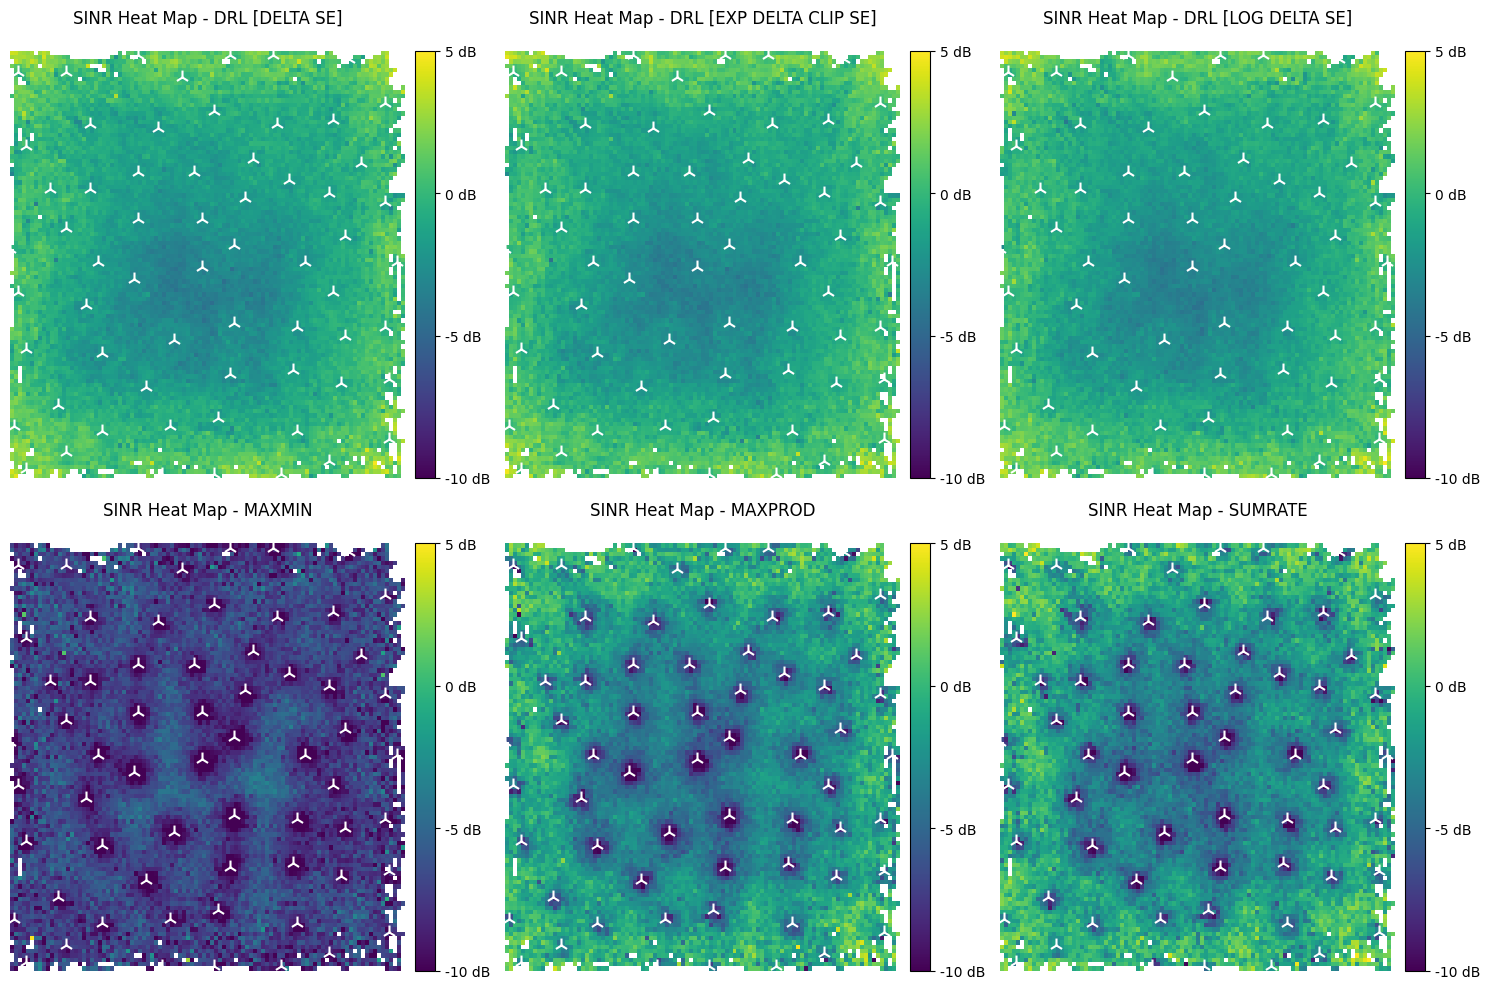

In [240]:
sinr_dataframes = {
    'DRL [DELTA SE]': MODEL_DELTA_SE_SINRs,
    'DRL [EXP DELTA CLIP SE]':MODEL_EXP_DELTA_CLIP_SE_SINRs,
    'DRL [LOG DELTA SE]': MODEL_LOG_DELTA_SE_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, grid_size, 0, colorbar_ticks)

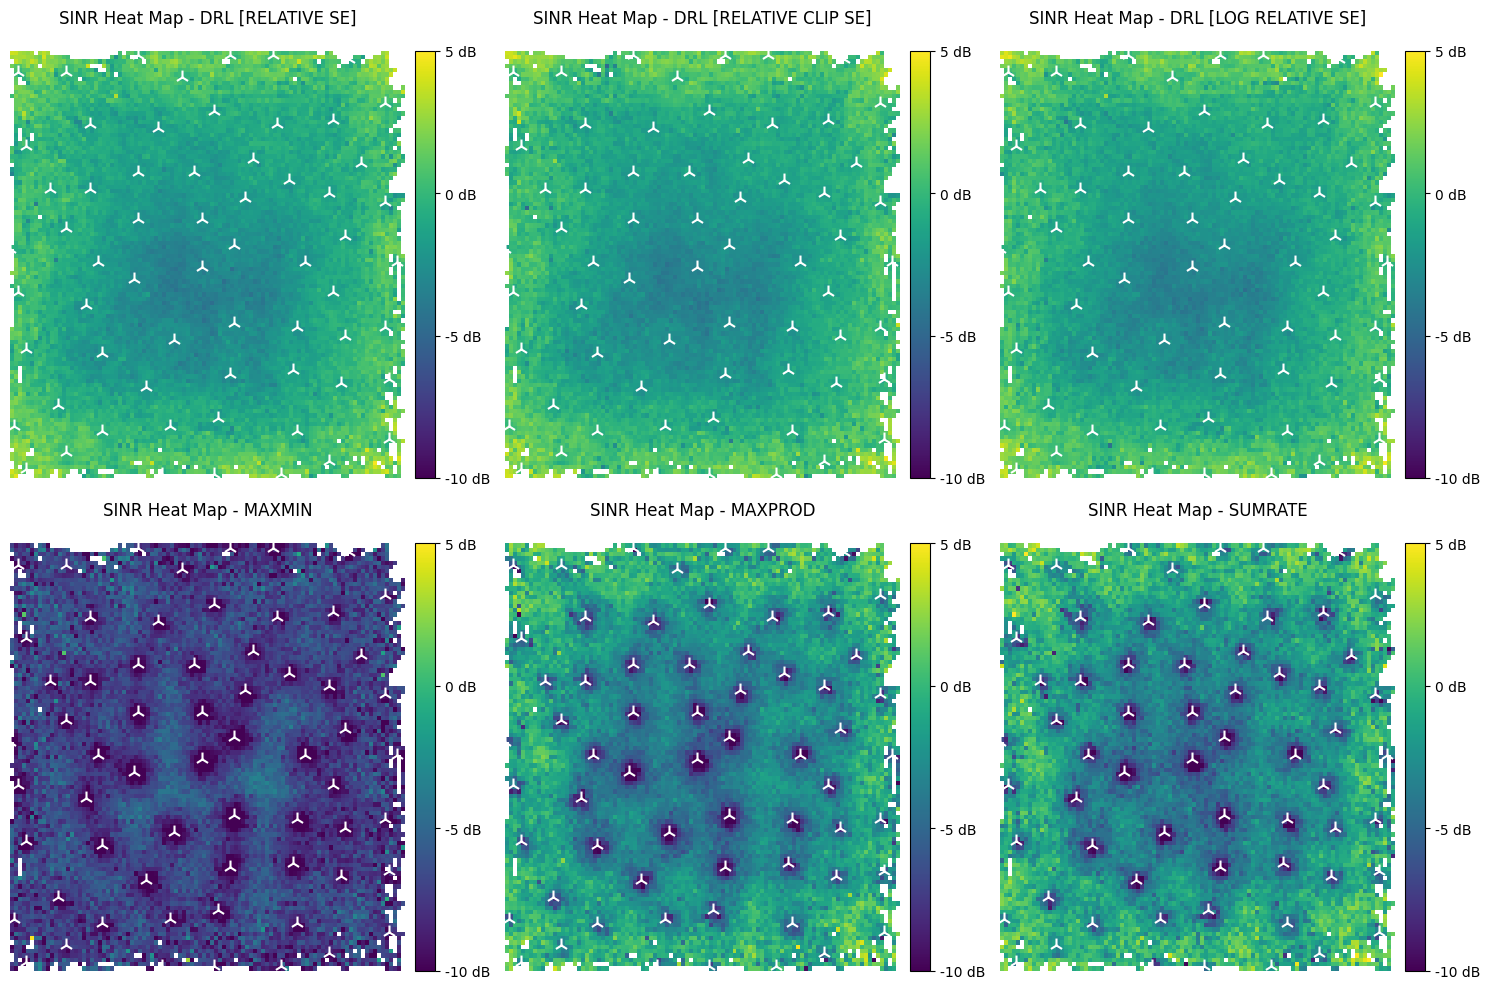

In [241]:
sinr_dataframes = {
    'DRL [RELATIVE SE]': MODEL_RELATIVE_SE_SINRs, 
    'DRL [RELATIVE CLIP SE]':MODEL_EXP_RELATIVE_CLIP_SE_SINRs, 
    'DRL [LOG RELATIVE SE]': MODEL_LOG_RELATIVE_SE_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, grid_size, 0, colorbar_ticks)

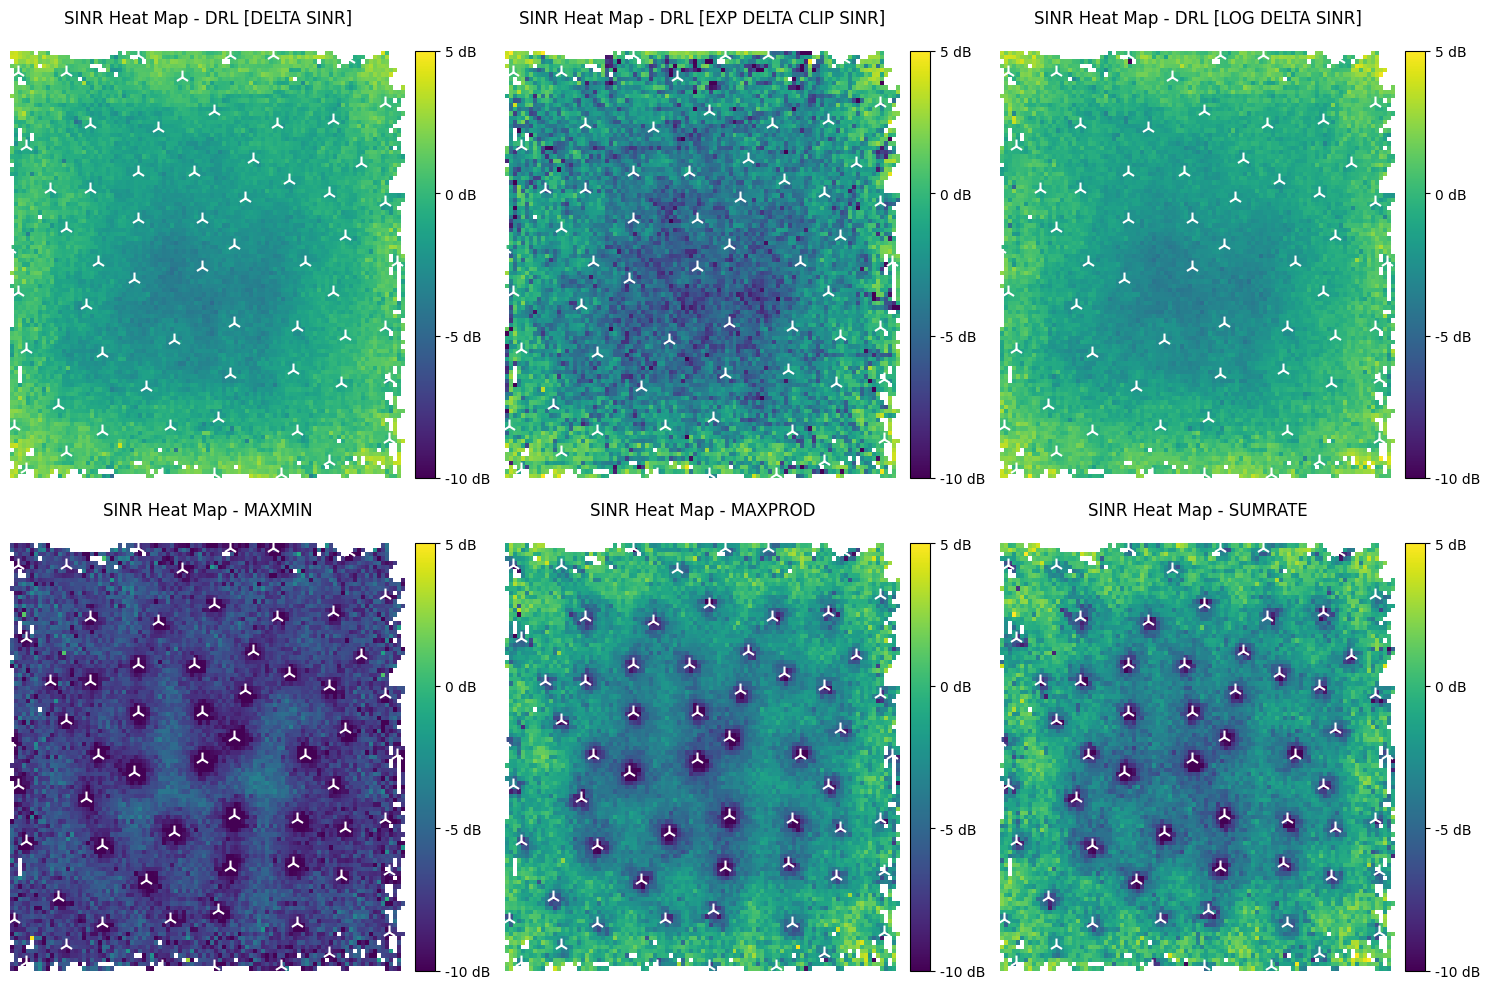

In [242]:
sinr_dataframes = {
    'DRL [DELTA SINR]': MODEL_DELTA_SINR_SINRs,
    'DRL [EXP DELTA CLIP SINR]':MODEL_EXP_DELTA_CLIP_SINR_SINRs,
    'DRL [LOG DELTA SINR]': MODEL_LOG_DELTA_SINR_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, grid_size, 0, colorbar_ticks)

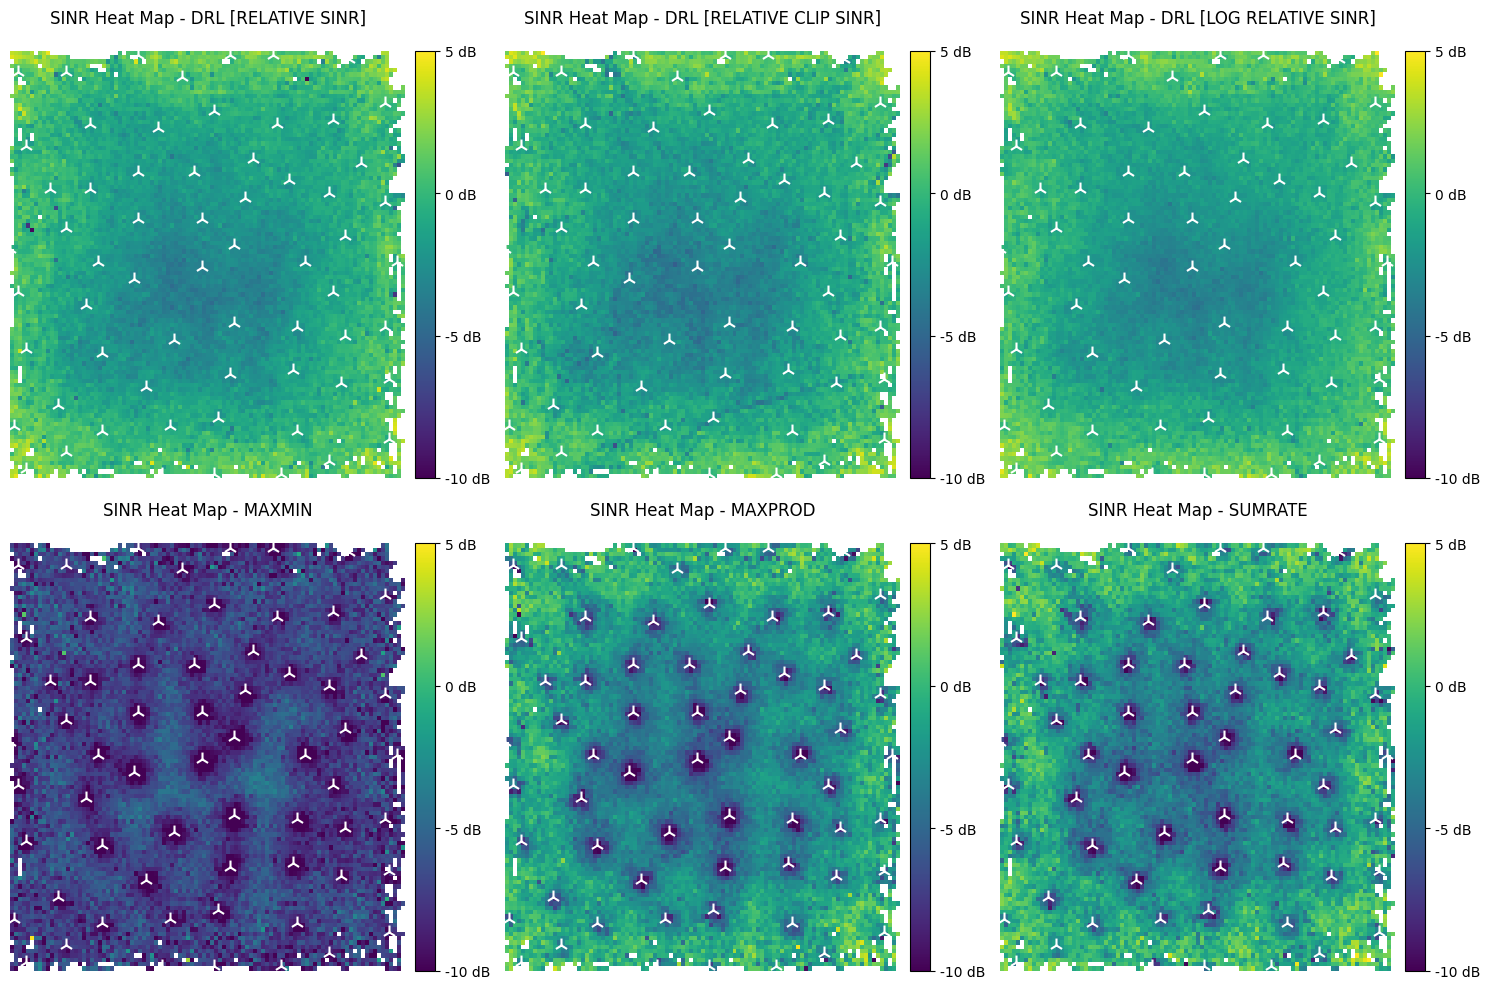

In [243]:
sinr_dataframes = {
    'DRL [RELATIVE SINR]': MODEL_RELATIVE_SINR_SINRs, 
    'DRL [RELATIVE CLIP SINR]':MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, 
    'DRL [LOG RELATIVE SINR]': MODEL_LOG_RELATIVE_SINR_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, grid_size, 0, colorbar_ticks)

## Computational Time

In [244]:
# load data from csv files
MODEL_DELTA_SE_DURATIONs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_DURATIONs.csv', index_col=0)
MODEL_LOG_DELTA_SE_DURATIONs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_RELATIVE_SE_DURATIONs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_DURATIONs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_DURATIONs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_DURATIONs.csv', index_col=0)
MODEL_DELTA_SINR_DURATIONs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_DURATIONs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_DURATIONs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_DURATIONs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_RELATIVE_SINR_DURATIONs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_DURATIONs.csv', index_col=0)

MAXMIN_DURATIONs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_DURATIONs.csv', index_col=0)
MAXPROD_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_DURATIONs.csv', index_col=0)
SUMRATE_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_DURATIONs.csv', index_col=0)

In [245]:
DURATION_DATA = {
    'MODEL_DELTA_SE_DURATIONs':                 {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SE_DURATIONs':        {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_DURATIONs},
    'MODEL_LOG_DELTA_SE_DURATIONs':             {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_DURATIONs},
    'MODEL_RELATIVE_SE_DURATIONs':              {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs':     {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs},
    'MODEL_LOG_RELATIVE_SE_DURATIONs':          {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_DURATIONs},
    'MODEL_DELTA_SINR_DURATIONs':               {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SINR_DURATIONs':      {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_DURATIONs},
    'MODEL_LOG_DELTA_SINR_DURATIONs':           {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_DURATIONs},
    'MODEL_RELATIVE_SINR_DURATIONs':            {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs':   {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs},
    'MODEL_LOG_RELATIVE_SINR_DURATIONs':        {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_DURATIONs},
    'MAXMIN_DURATIONs':                         {'label': 'MAX-MIN',                    'data': MAXMIN_DURATIONs},
    'MAXPROD_DURATIONs':                        {'label': 'MAX-PROD',                   'data': MAXPROD_DURATIONs},
    'SUMRATE_DURATIONs':                        {'label': 'MAX-SUM-RATE',               'data': SUMRATE_DURATIONs},
}

In [246]:
duration_benchmarking(DURATION_DATA)

Model  Mean Duration  Median Duration  \
0            DRL [DELTA SE]       0.000362         0.000336   
1        DRL [EXP DELTA SE]       0.000277         0.000263   
2        DRL [LOG DELTA SE]       0.000232         0.000218   
3         DRL [RELATIVE SE]       0.000362         0.000336   
4     DRL [EXP RELATIVE SE]       0.000230         0.000217   
5     DRL [LOG RELATIVE SE]       0.000224         0.000209   
6          DRL [DELTA SINR]       0.000210         0.000199   
7      DRL [EXP DELTA SINR]       0.000198         0.000185   
8      DRL [LOG DELTA SINR]       0.000188         0.000179   
9       DRL [RELATIVE SINR]       0.000182         0.000175   
10  DRL [EXP RELATIVE SINR]       0.000192         0.000181   
11  DRL [LOG RELATIVE SINR]       0.000209         0.000201   
12                  MAX-MIN       0.298062         0.300727   
13                 MAX-PROD       0.058537         0.052742   
14             MAX-SUM-RATE       0.060590         0.051965   

    Standard Deviation  Max Duration  Min Duration  
0             0.000155      0.001846      0.000320  
1             0.000047      0.000498      0.000187  
2             0.000037      0.000380      0.000186  
3             0.000155      0.001846      0.000320  
4             0.000045      0.000461      0.000182  
5             0.000057      0.000623      0.000172  
6             0.000034      0.000348      0.000156  
7             0.000048      0.000424      0.000152  
8             0.000034      0.000315      0.000145  
9             0.000032      0.000334      0.000144  
10            0.000037      0.000373      0.000146  
11            0.000037      0.000410      0.000169  
12            0.052475      0.427013      0.135599  
13            0.029409      0.121928      0.012742  
14            0.034649      0.136080      0.012107